In [1]:
#import the EXOSIMS
import EXOSIMS
import EXOSIMS.MissionSim

#import some useful modules
import os.path
import numpy as np
import jason
import matplotlib.pyplot as plt
import matplotlib
from astropy.visualization import quantity_support
from astropy import units as u
from astropy.io import fits


#import Universe Models
import EXOSIMS.SimulatedUniverse.SAG13Universe
import EXOSIMS.SimulatedUniverse.KeplerLikeUniverse
import EXOSIMS.SimulatedUniverse.KnownRVPlanetsUniverse
import EXOSIMS.SimulatedUniverse.DulzPlavchanUniverse

#import star catalogs
from EXOSIMS.StarCatalog import EXOCAT1


#reset config of plots
SMALL_SIZE = 8
MEDIUM_SIZE = 14
BIGGER_SIZE = 17

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


#astropy quantity support
quantity_support()

#define the function to find indices of values in a list with condition
def find_indices(lst, condition):
    return [i for i, elem in enumerate(lst) if condition(elem)]

## This simulation uses SAG13 Universe & Planet Population

In [2]:
#setup simulation
#a detailed describition can be found in readme.pdf
specs = {"modules": {
      "PlanetPopulation": "SAG13",
      "StarCatalog": "EXOCAT1",
      "OpticalSystem": "Nemati",
      "ZodiacalLight": "Stark",
      "BackgroundSources": " ",
      "PlanetPhysicalModel": "Forecaster",
      "PostProcessing": " ",
      "Completeness": " ",
      "TargetList": " ",
      "SimulatedUniverse": "SAG13Universe"},
      "scienceInstruments": [{ "name": "imager"}],
      "starlightSuppressionSystems": [{ "name": "coronagraph"}],
      "explainFiltering": True}

In [3]:
#instantiate all modules
SU = EXOSIMS.SimulatedUniverse.SAG13Universe.SAG13Universe(**specs)

Imported TargetList (prototype module) from EXOSIMS.Prototypes.TargetList
Imported EXOCAT1 (specific module) from EXOSIMS.StarCatalog.EXOCAT1
Imported Nemati (specific module) from EXOSIMS.OpticalSystem.Nemati
Imported Stark (specific module) from EXOSIMS.ZodiacalLight.Stark
Imported PostProcessing (prototype module) from EXOSIMS.Prototypes.PostProcessing
Imported BackgroundSources (prototype module) from EXOSIMS.Prototypes.BackgroundSources
Imported Completeness (prototype module) from EXOSIMS.Prototypes.Completeness
Imported SAG13 (specific module) from EXOSIMS.PlanetPopulation.SAG13
Imported Forecaster (specific module) from EXOSIMS.PlanetPhysicalModel.Forecaster
2396 targets imported from star catalog.
2089 targets remain after nan filtering.
1985 targets remain after binary filter.
1841 targets remain after IWA filter.
1841 targets remain after integration time cutoff filter.
1841 targets remain after completeness filter.


In [4]:
#check the simulated uviverse
print('Star Specs:',SU.TargetList.Spec)
print('Number of stars:',SU.TargetList.nStars)
print('Number of planets:',SU.nPlans)

Star Specs: ['G9V' 'M2' 'K5V' ... 'K3/4V' 'G8V' '']
Number of stars: 1841
Number of planets: 3718


### Mass distribution of planets

In [5]:
#define the masses of all the planets
#mass in earth mass
masses = SU.Mp

#define number of total stars
nstars = SU.TargetList.nStars

#convert spectrum object array to string array
Spec=SU.TargetList.Spec.astype(str)

#assign each palent the spec type of its host star
planet_spec = np.array([Spec[i] for i in SU.plan2star])

In [6]:
#pick out the planets with M type host star
#for i in Mspec, if == 0 then means it contains str 'M'
#in other word, its M-type
strM = 'M' 
Mspec = []
for s in planet_spec:
    M = s.find(strM)
    Mspec.append(M)

#convert to array
Mspec = np.array(Mspec)
#get the index of all the planets around M stars
M_id = np.where(Mspec==0)

#use the indexing to extract masses for all the planets around M stars
M_mass = [masses[i] for i in M_id][0]

#the number of M-hosting planets
M_len = len(M_mass)
print(len(M_mass))

#convert earth mass in terms of jupiter mass
M_mass = M_mass.value/317.82

1152


In [7]:
#do the same work as in the last cell, pick out the planets around FGK type stars
#for i in FGKspec, if == 0 then means it contains str 'F'
#in other word, its F-type
strF = 'F'
strG = 'G'
strK = 'K'
FGKspec = []
for s in planet_spec:
    F = s.find(strF)
    G = s.find(strG)
    K = s.find(strK)
    FGKspec.append(F&G&K)

#convert to array
FGKspec = np.array(FGKspec)
#get the index of all the planets around FGK stars
FGK_id = np.where(FGKspec==0)

#use the indexing to extract mass for all the planets around FGK stars
FGK_mass = [masses[i] for i in FGK_id][0]

#the number of FGK-hosting planets
FGK_len = len(FGK_mass)

#change mass unit to jupiter mass
# 1MJ = 318ME
FGK_mass = FGK_mass.value/317.82

Text(0.5,1,' Mass distribution of 1152 planets aroud M-type stars within 30pc')

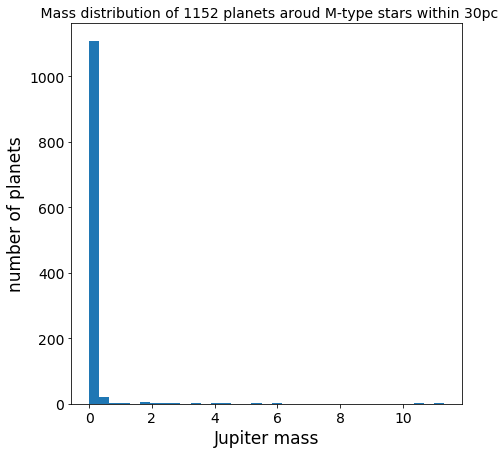

In [8]:
#plot the mass distribution of planets around M stars
plt.figure(figsize=(7,7))
hist, Mbins, _ = plt.hist(M_mass, bins=35)
plt.xlabel('Jupiter mass')
plt.ylabel('number of planets')
plt.title(' Mass distribution of %d planets aroud M-type stars within 30pc' %M_len)

<IPython.core.display.Javascript object>


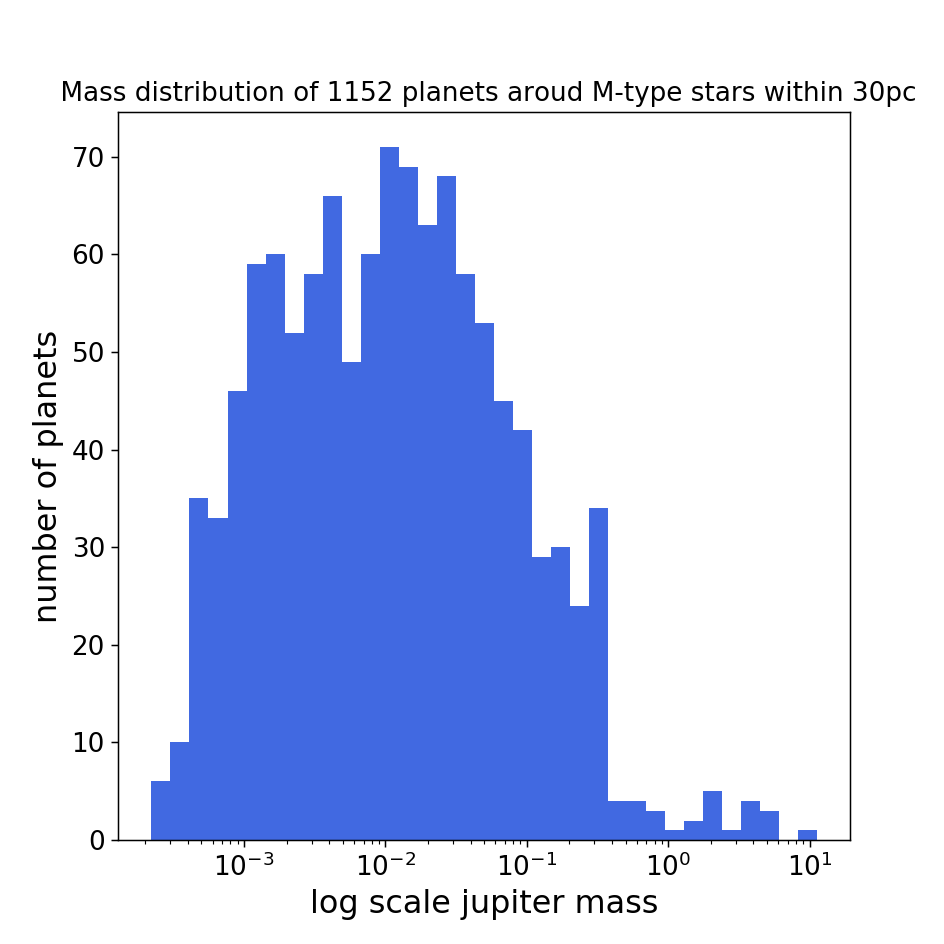

In [43]:
%matplotlib notebook 
#plot the mass distribution of planets around M-type stars in log scale JM
plt.figure(figsize=(7,7))
#change the linear scale to log scale
Mlogbins = np.logspace(np.log10(Mbins[0]),np.log10(Mbins[-1]),len(Mbins))
plt.hist(M_mass,bins=Mlogbins,color="royalblue")
plt.gca().set_xscale("log")

plt.xlabel('log scale jupiter mass')
plt.ylabel('number of planets')
plt.title(' Mass distribution of %d planets aroud M-type stars within 30pc' %M_len)

plt.savefig('M-type.png')

<IPython.core.display.Javascript object>


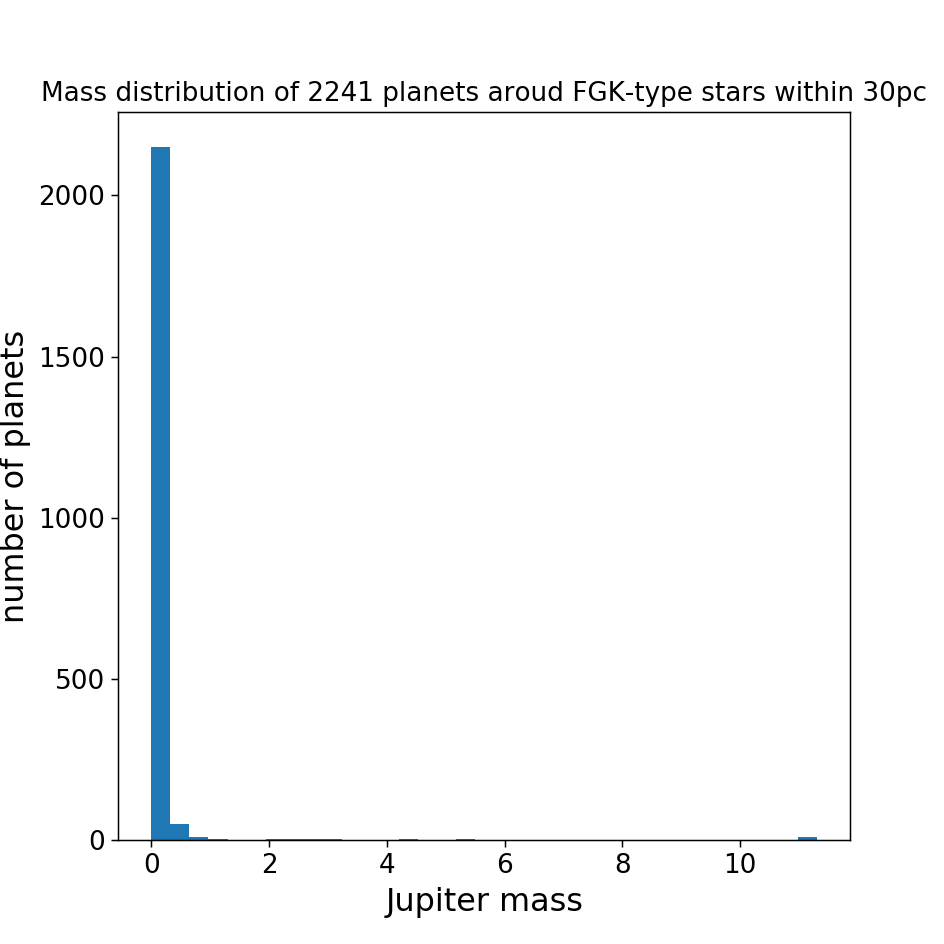

Text(0.5,1,'Mass distribution of 2241 planets aroud FGK-type stars within 30pc')

In [10]:
#plot mass distribution of planets around FGK type stars
plt.figure(figsize=(7,7))
hist, FGKbins, _ = plt.hist(FGK_mass, bins=35)
plt.xlabel('Jupiter mass')
plt.ylabel('number of planets')
plt.title("Mass distribution of %d planets aroud FGK-type stars within 30pc" %FGK_len)

<IPython.core.display.Javascript object>


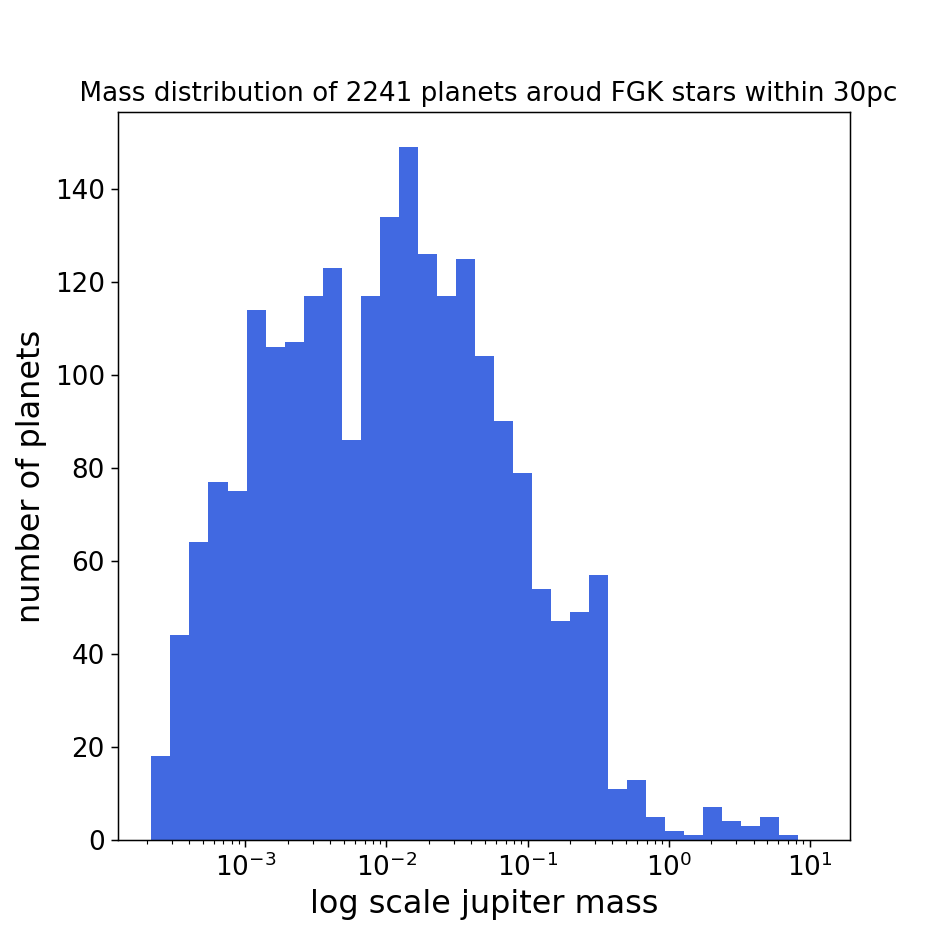

In [44]:
#plot mass distribution of planets around FGK type stars in log scale
plt.figure(figsize=(7,7))
FGKlogbins = np.logspace(np.log10(FGKbins[0]),np.log10(FGKbins[-1]),len(FGKbins))
plt.hist(FGK_mass,bins=FGKlogbins,color="royalblue")
plt.gca().set_xscale("log")

plt.xlabel('log scale jupiter mass')
plt.ylabel('number of planets')
plt.title(' Mass distribution of %d planets aroud FGK stars within 30pc'%FGK_len)

plt.savefig('FGK-type.png')

## Temperature of planets due to host star

In [45]:
#caculate the equlibrium temperature of the planets using
# their albedo and the luminsity of the host stars 
#based on stefan-boltzmann law

#define some variables
star_name = SU.TargetList.Name.astype(str)
star_mag = SU.TargetList.MV
albedo = SU.p

#star luminsity in ln(sun lum)
star_lum = SU.TargetList.L

#define distance of the planets form their host star
d = SU.d
dist = d.to(u.m)

#define solar luministy in Watt
solar_lum = 3.828E26

#change the lum unit to Watt
star_lum_W = []
for i in star_lum:
    lum = solar_lum*(np.e**i)
    star_lum_W.append(lum)
    
#assign each palent the lum of its star
planet_star_lum = np.array([star_lum_W[i] for i in SU.plan2star])

#extract the planets around FGK/M stars for their corresponding star lum
FGKstar_lum = [planet_star_lum[i] for i in FGK_id][0]
Mstar_lum = [planet_star_lum[i] for i in M_id][0]

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in double_scalars


In [46]:
#use the indexing to extract distant and albedo for all the planets around FGK stars
FGK_dist = [dist[i] for i in FGK_id][0]
FGK_albedo = [albedo[i] for i in FGK_id][0]

#use the indexing to extract distant adn albedo for all the planets around M stars
M_dist = [dist[i] for i in M_id][0]
M_albedo = [albedo[i] for i in M_id][0]

#### Stellar Temp for planets around FGK stars

In [53]:
#define Stefan-Boltzman constant
sigma = 5.6704E-8

#caculate the tempurature in K using stefan-boltzmann law
FGK_T = np.power((1-FGK_albedo)*FGKstar_lum/(4.*np.pi*(FGK_dist**2.)*sigma),1./4)
#change astropy unit to floats
FGK_Temp = FGK_T.value

#define the indices of planets with reasonable temperature
FGK_temp_id = find_indices(FGK_Temp, lambda i: i<=2500)

#limt the range of the temperature to get rid of the extremes
Temp_FGK = [FGK_Temp[i] for i in FGK_temp_id]

#the number of FGK-planets after excluding the extremes
FGK_len_new = len(Temp_FGK)

<IPython.core.display.Javascript object>


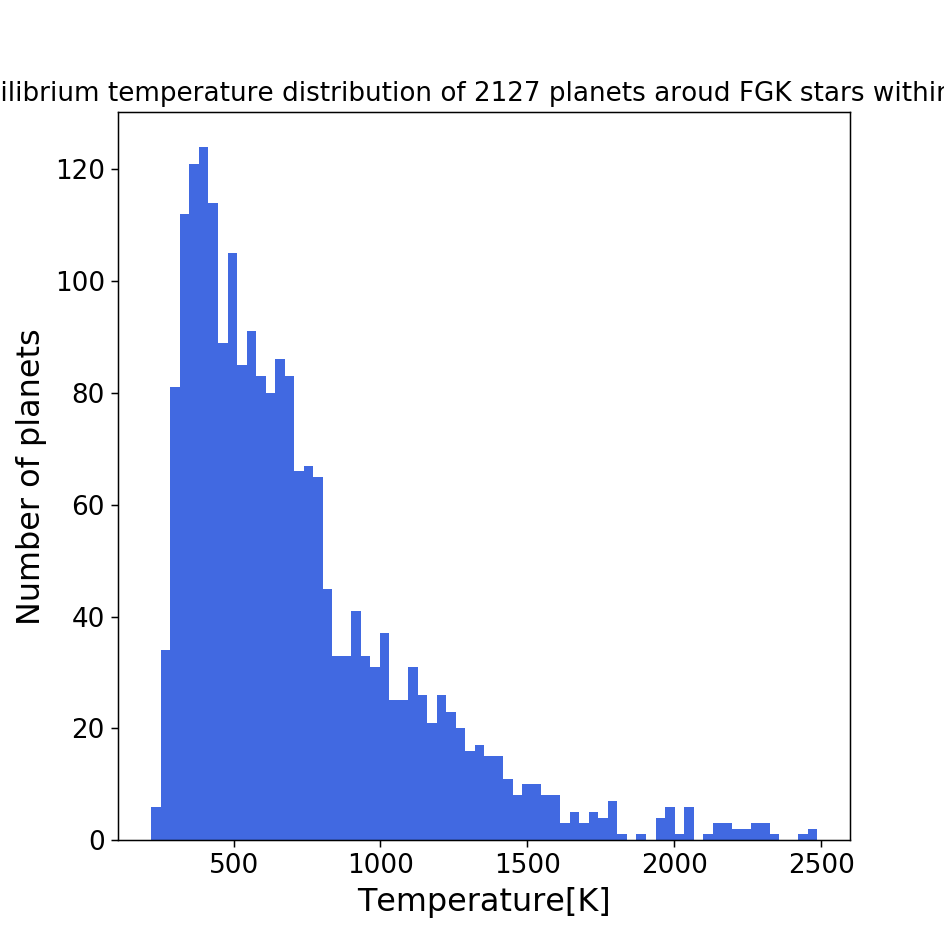

In [54]:
#plot the equilibrium temperature distribution of FGK-hosting planets
plt.figure(figsize=(7,7))

hist, FGK_Tbins, _ = plt.hist(Temp_FGK, bins=70,color="royalblue")
plt.xlabel('Temperature[K]')
plt.ylabel('Number of planets')
plt.title(' Equilibrium temperature distribution of %d planets aroud FGK stars within 30pc'%FGK_len_new)

plt.savefig('FGK-T.png')

<IPython.core.display.Javascript object>


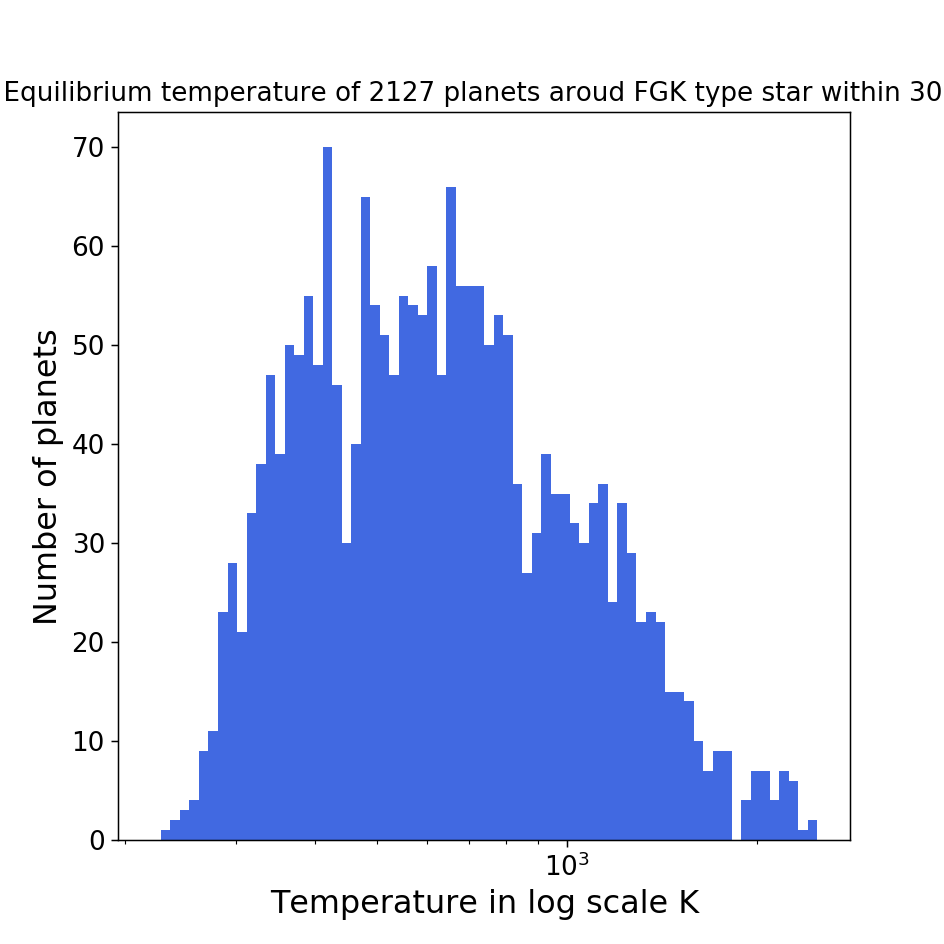

Text(0.5,1,' Equilibrium temperature of 2127 planets aroud FGK type star within 30pc')

In [55]:
#plot the equilibrium temperature distribution of FGK-hosting planets
#in log scales
plt.figure(figsize=(7,7))

FGK_Tlogbins = np.logspace(np.log10(FGK_Tbins[0]),np.log10(FGK_Tbins[-1]),len(FGK_Tbins))
plt.hist(Temp_FGK,bins=FGK_Tlogbins,color="royalblue")
plt.gca().set_xscale("log")

plt.xlabel('Temperature in log scale K')
plt.ylabel('Number of planets')
plt.title(' Equilibrium temperature of %d planets aroud FGK type star within 30pc'%FGK_len_new)

#### Temp for planets around M stars

In [56]:
#caculate the tempurature in K
M_T = np.power((1-M_albedo)*Mstar_lum/(4.*np.pi*(M_dist**2.)*sigma),1./4)
#change astropy unit to floats
M_Temp = M_T.value

#define the indices of planets with reasonable temperature
M_temp_id = find_indices(M_Temp, lambda i: i<=2500)

#limt the range of the temperature to get rid of the extremes
Temp_M = [M_Temp[i] for i in M_temp_id]

#the number of M-planets after excluding the extremes
M_len_new = len(Temp_M)

<IPython.core.display.Javascript object>


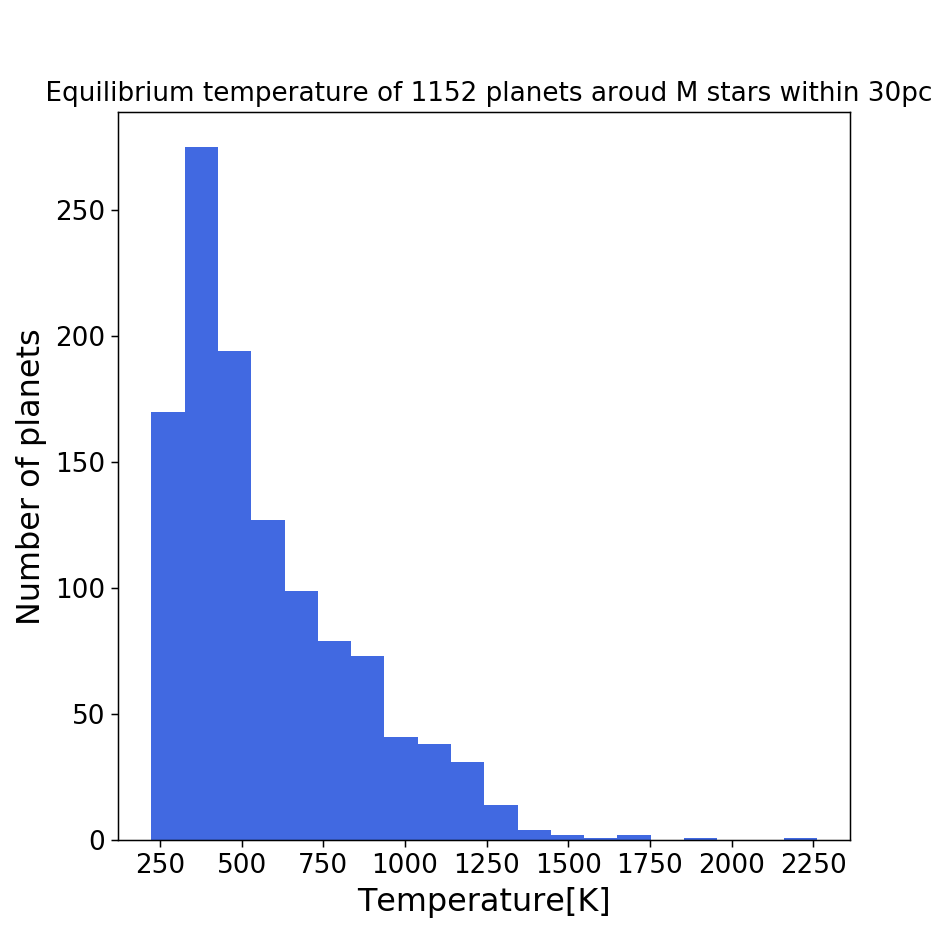

In [57]:
#plot the equilibrium temperature distribution of M-hosting planets
plt.figure(figsize=(7,7))

hist, M_Tbins, _ = plt.hist(Temp_M, bins=20,color="royalblue")
plt.xlabel('Temperature[K]')
plt.ylabel('Number of planets')
plt.title(' Equilibrium temperature of %d planets aroud M stars within 30pc'%M_len_new)

plt.savefig('M-T.png')

<IPython.core.display.Javascript object>


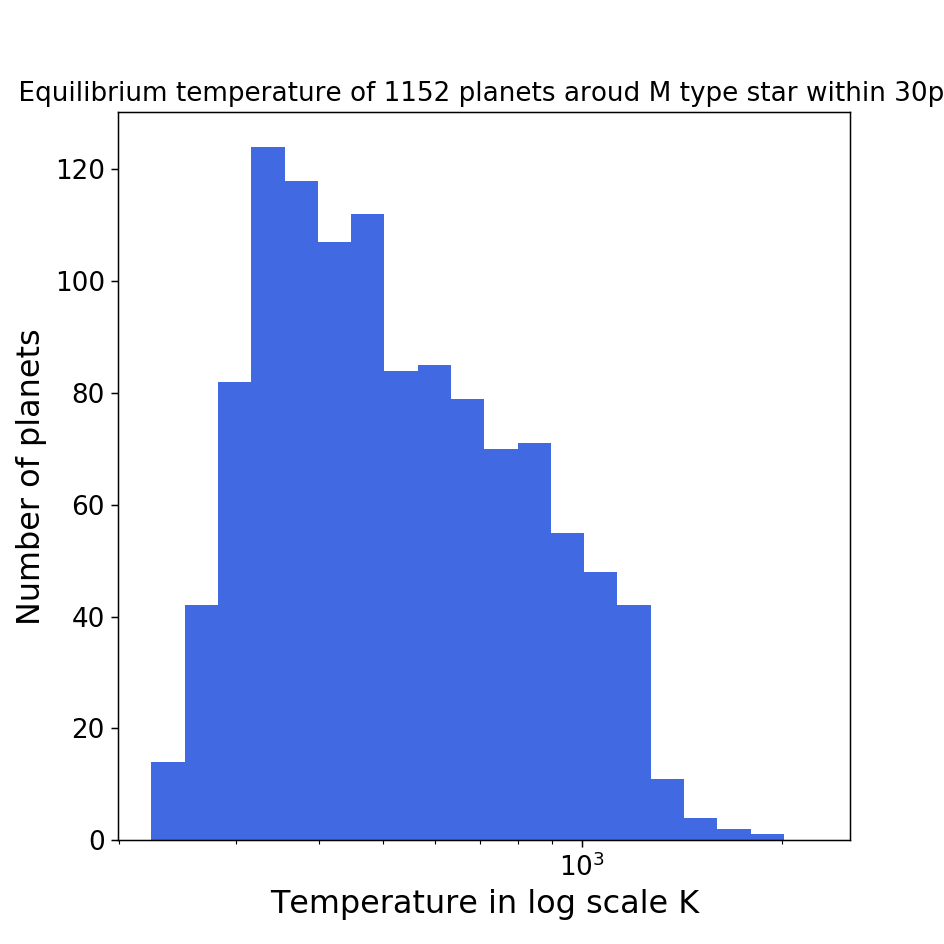

Text(0.5,1,' Equilibrium temperature of 1152 planets aroud M type star within 30pc')

In [58]:
#plot the equilibrium temperature distribution of M-hosting planets
#in log scales
plt.figure(figsize=(7,7))

M_Tlogbins = np.logspace(np.log10(M_Tbins[0]),np.log10(M_Tbins[-1]),len(M_Tbins))
plt.hist(Temp_M,bins=M_Tlogbins,color="royalblue")
plt.gca().set_xscale("log")

plt.xlabel('Temperature in log scale K')
plt.ylabel('Number of planets')
plt.title(' Equilibrium temperature of %d planets aroud M type star within 30pc'%M_len_new)

### Planet distance vs stellar temperature

In [59]:
#change the distance unit to AU
FGK_AU = FGK_dist.to(u.AU)
M_AU = M_dist.to(u.AU)

<IPython.core.display.Javascript object>


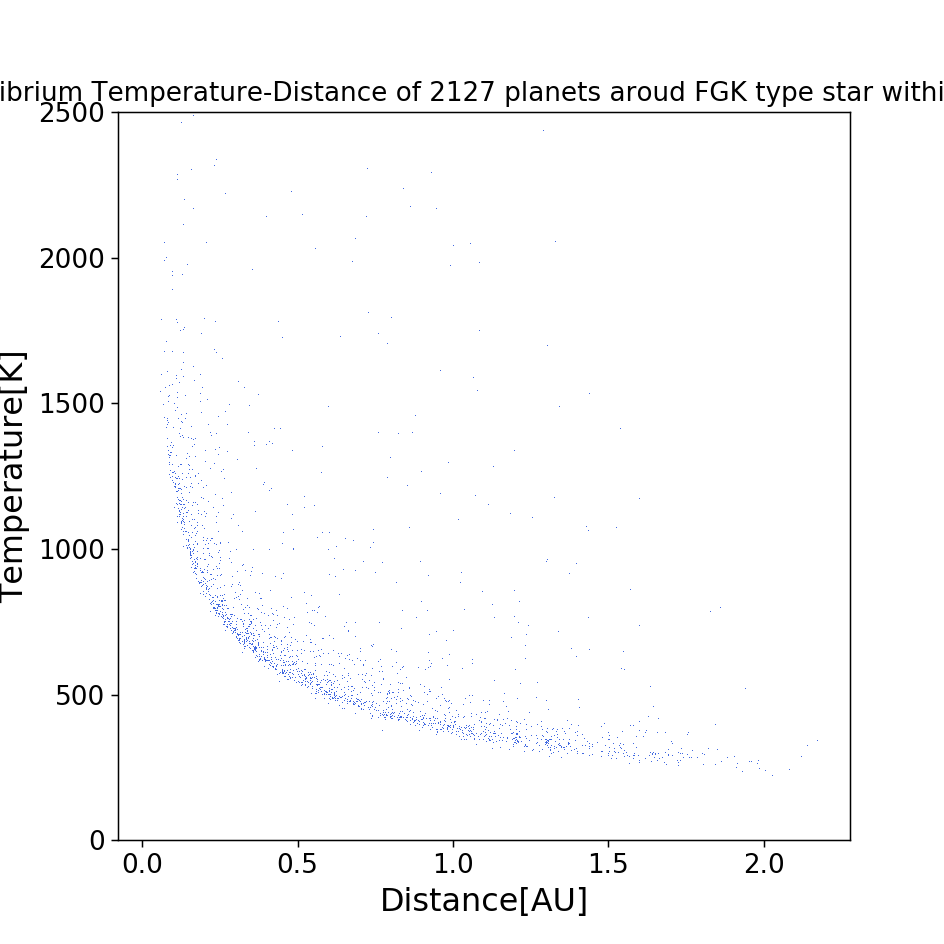

Text(0.5,1,'Equilibrium Temperature-Distance of 2127 planets aroud FGK type star within 30pc')

In [21]:
#plot the distance vs temperature for FGK-arounding planets
plt.figure(figsize=(7,7))

plt.errorbar(FGK_AU, FGK_Temp,fmt= ',' ,c='royalblue')
plt.ylim(0,2500)

plt.xlabel('Distance[AU]')
plt.ylabel('Temperature[K]')
plt.title('Equilibrium Temperature-Distance of %d planets aroud FGK type star within 30pc'%FGK_len_new)

<IPython.core.display.Javascript object>


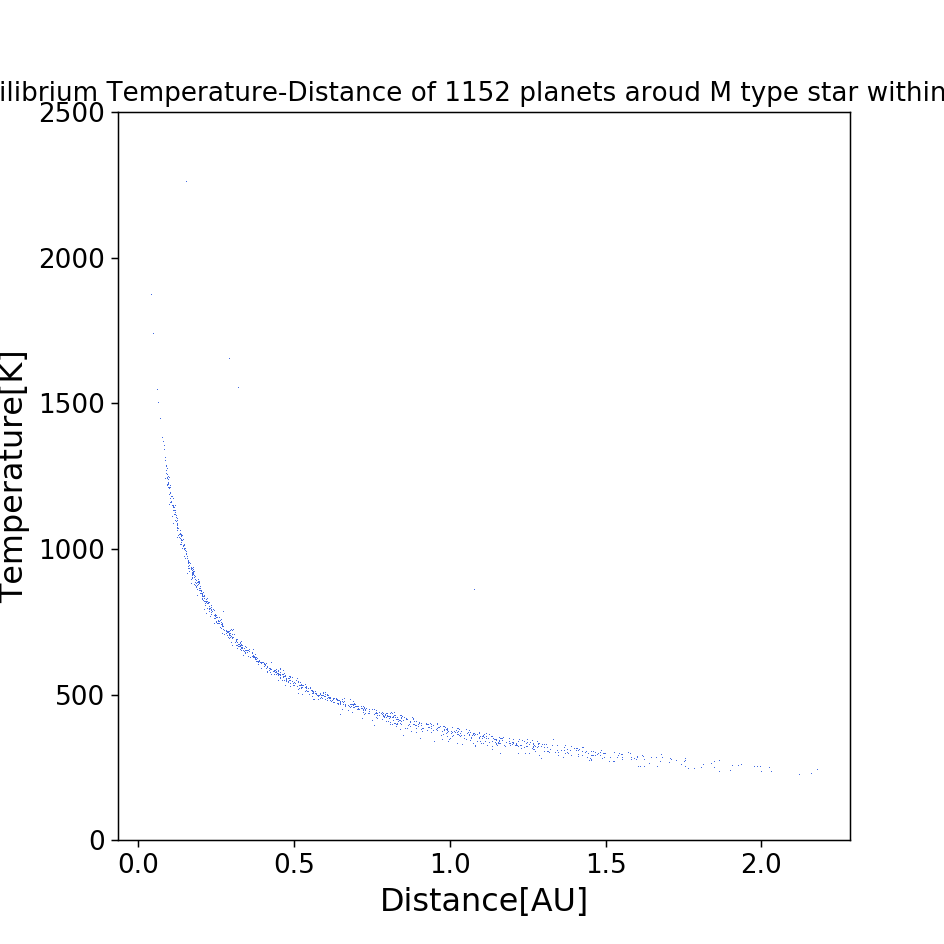

Text(0.5,1,'Equilibrium Temperature-Distance of 1152 planets aroud M type star within 30pc')

In [60]:
#plot the distance vs temperature for M-arounding planets
plt.figure(figsize=(7,7))

plt.errorbar(M_AU, M_Temp,fmt= ',' ,c='royalblue')
plt.ylim(0,2500)

plt.xlabel('Distance[AU]')
plt.ylabel('Temperature[K]')
plt.title('Equilibrium Temperature-Distance of %d planets aroud M type star within 30pc'%M_len_new)

### Age of the Stars

In [23]:
# an assumed proper range of star ages within 80pc would be 1.5Gyr~12Gyr
# this range is from Cignoni_et_al.(2006)
nPlans = SU.nPlans
star_age = np.random.uniform(1.5e+09,12e+09,size=nPlans)

#use the indexing to extract age for all the planets around M stars
M_age = [star_age[i] for i in M_id][0]
M_logage = np.log10(M_age)

#use the indexing to extract age for all the planets around FGK stars
FGK_age = [star_age[i] for i in FGK_id][0]
FGK_logage = np.log10(FGK_age)

### Hot Start Gas-Giants(M=>0.8Mj) Mass-Temp-Age

In [61]:
#import the model data from Forteny_et_al.2008 
#Mj=1
age1 = np.array([1.000e+06,2.154e+06,4.642e+06,1.000e+07])
temp1 = np.array([900.3,747.5,644.2,554.6])
#Mj=2
age2 = np.array([1.000e+06,2.154e+06,4.642e+06,1.000e+07,2.154e+07,4.642e+07])
temp2 = np.array([1266.7,1048.8,855.3,710.3,605.8,512.9])
#Mj=4
age4 = np.array([1.000e+06,2.154e+06,4.642e+06,1.000e+07,2.154e+07,4.642e+07,1.000e+08])
temp4 = np.array([1657.0,1432.0,1207.6,989.1,805.3,673.8,574.6])
#Mj=6
age6 = np.array([1.000e+06,2.154e+06,4.642e+06,1.000e+07,2.154e+07,4.642e+07,1.000e+08,2.154e+08])
temp6 = np.array([1984.0,1720.9,1464.2,1219.6,988.4,803.5,674.9,574.9])
#Mj=8
age8 = np.array([1.000e+06,2.154e+06,4.642e+06,1.000e+07,2.154e+07,4.642e+07,1.000e+08,2.154e+08,4.642e+08])
temp8 = np.array([2184.9,1987.6,1656.0,1400.7,1163.4,940.0,769.1,659.2,543.2])
#Mj=10
age10 = np.array([1.000e+06,2.154e+06,4.642e+06,1.000e+07,2.154e+07,4.642e+07,1.000e+08,2.154e+08,4.642e+08,1.000e+09])
temp10 = np.array([2315.7,2168.4,1873.0,1553.8,1307.0,1072.7,871.5,735.9,614.5,498.2])

In [62]:
#transfer the log functions to linear functions and perform fit
#define log10
def log(x):
    return np.log10(x)

#define the function of linear fit
def linearfit(x,y):
    return np.polyfit(log(x),log(y),1)

#fit all the six lines in linearly
a1,b1 = linearfit(age1,temp1)
a2,b2 = linearfit(age2,temp2)
a4,b4 = linearfit(age4,temp4)
a6,b6 = linearfit(age6,temp6)
a8,b8 = linearfit(age8,temp8)
a10,b10 = linearfit(age10,temp10)

<IPython.core.display.Javascript object>


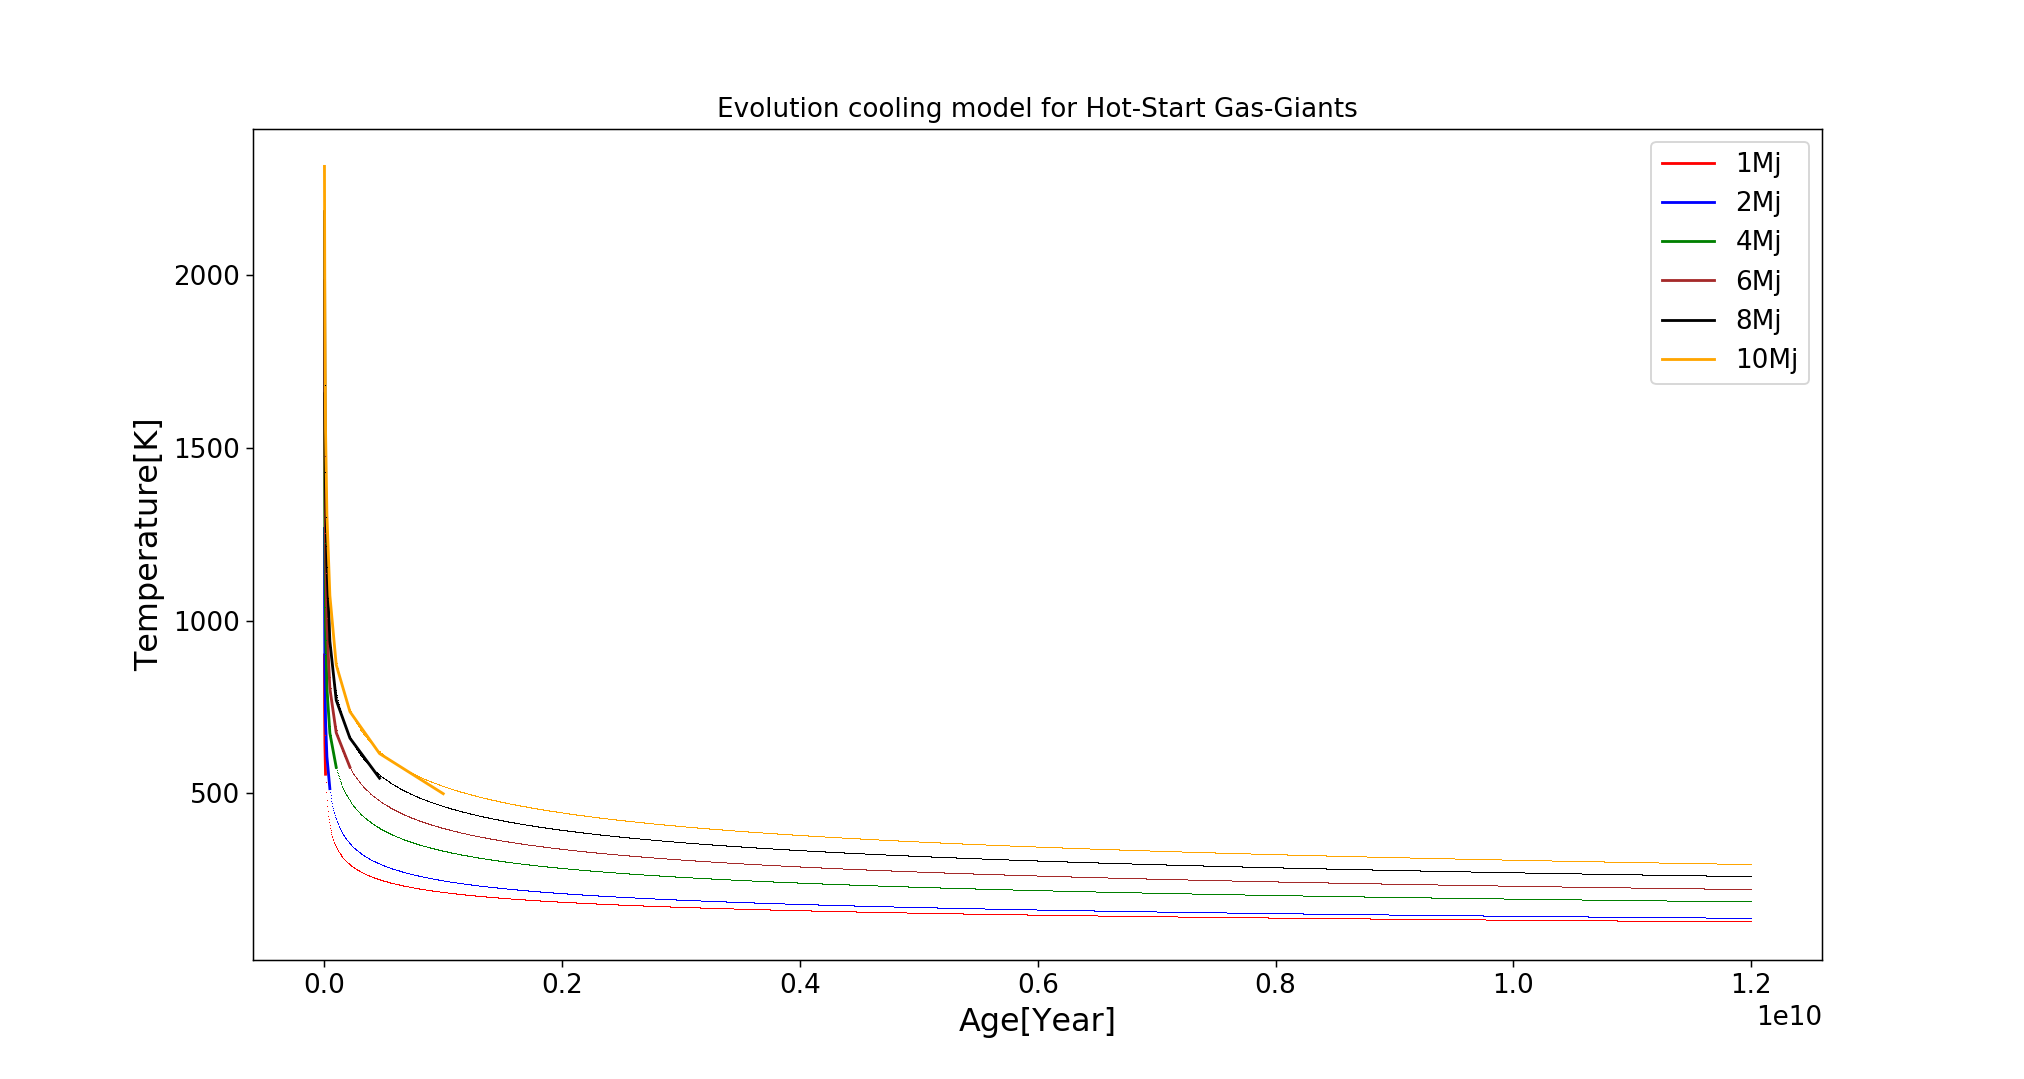

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


In [63]:
#plot both the original data and extrapolated functions

plt.figure(figsize=(15,8))

plt.ylabel('Temperature[K]')
plt.xlabel('Age[Year]')
plt.title("Evolution cooling model for Hot-Start Gas-Giants")

#plot Forteny's data
plt.plot(age1,temp1,label='1Mj',color = 'red')
plt.plot(age2,temp2,label='2Mj',color = 'blue')
plt.plot(age4,temp4,label='4Mj',color = 'green')
plt.plot(age6,temp6,label='6Mj',color = 'brown')
plt.plot(age8,temp8,label='8Mj',color = 'black')
plt.plot(age10,temp10,label='10Mj',color = 'orange')

#define an age-range for nearby stars from Cignoni_et_al.(2006)
#and change all the linear-fitted parameters back to log scale
model_age = log(np.linspace(0,12e+09,3000))

#caculate the extrapolated temperature
#based on the fitted age data and change the scale to log
modtemp1 = 10**(model_age*a1+b1)
modtemp2 = 10**(model_age*a2+b2)
modtemp4 = 10**(model_age*a4+b4)
modtemp6 = 10**(model_age*a6+b6)
modtemp8 = 10**(model_age*a8+b8)
modtemp10 = 10**(model_age*a10+b10)

#plot extrapolated tenp-age functions
plt.errorbar(10**model_age,modtemp1,fmt= ',',color = 'red')
plt.errorbar(10**model_age,modtemp2,fmt= ',',color = 'blue')
plt.errorbar(10**model_age,modtemp4,fmt= ',',color = 'green')
plt.errorbar(10**model_age,modtemp6,fmt= ',',color = 'brown')
plt.errorbar(10**model_age,modtemp8,fmt= ',',color = 'black')
plt.errorbar(10**model_age,modtemp10,fmt= ',',color = 'orange')
plt.legend()

### Fit in functions in the hot-start cooling model for FGK stars

In [64]:
#get rid of the planets with extreme temperatures
#and limit the planet mass to greater or equal to 0.8 Jupiter mass
FGKmass = [FGK_mass[i] for i in FGK_temp_id]
FGK_GGmass_id = find_indices(FGKmass, lambda i: 0.8<=i<=11.0)
FGK_GGmass = [FGKmass[i] for i in FGK_GGmass_id]
FGK_len_GG = len(FGK_GGmass)

#define the indexing of the mass ranges in FGK_planet array
FGK_Mj1_id = find_indices(FGKmass, lambda i: 0.8<=i<=1.8)
FGK_Mj2_id = find_indices(FGKmass, lambda i: 1.8<i<=3.0)
FGK_Mj4_id = find_indices(FGKmass, lambda i: 3.<i<=5.0)
FGK_Mj6_id = find_indices(FGKmass, lambda i: 5.0<i<=7.0)
FGK_Mj8_id = find_indices(FGKmass, lambda i: 7.0<i<=9.0)
FGK_Mj10_id = find_indices(FGKmass, lambda i: 9.0<i<=11.0)

#the age of the planets in their corresponding mass-range
FGK_Mj1_age = np.asarray([FGK_logage[i] for i in FGK_Mj1_id])
FGK_Mj2_age = np.asarray([FGK_logage[i] for i in FGK_Mj2_id])
FGK_Mj4_age = np.asarray([FGK_logage[i] for i in FGK_Mj4_id])
FGK_Mj6_age = np.asarray([FGK_logage[i] for i in FGK_Mj6_id])
FGK_Mj8_age = np.asarray([FGK_logage[i] for i in FGK_Mj8_id])
FGK_Mj10_age = np.asarray([FGK_logage[i] for i in FGK_Mj10_id])

<IPython.core.display.Javascript object>


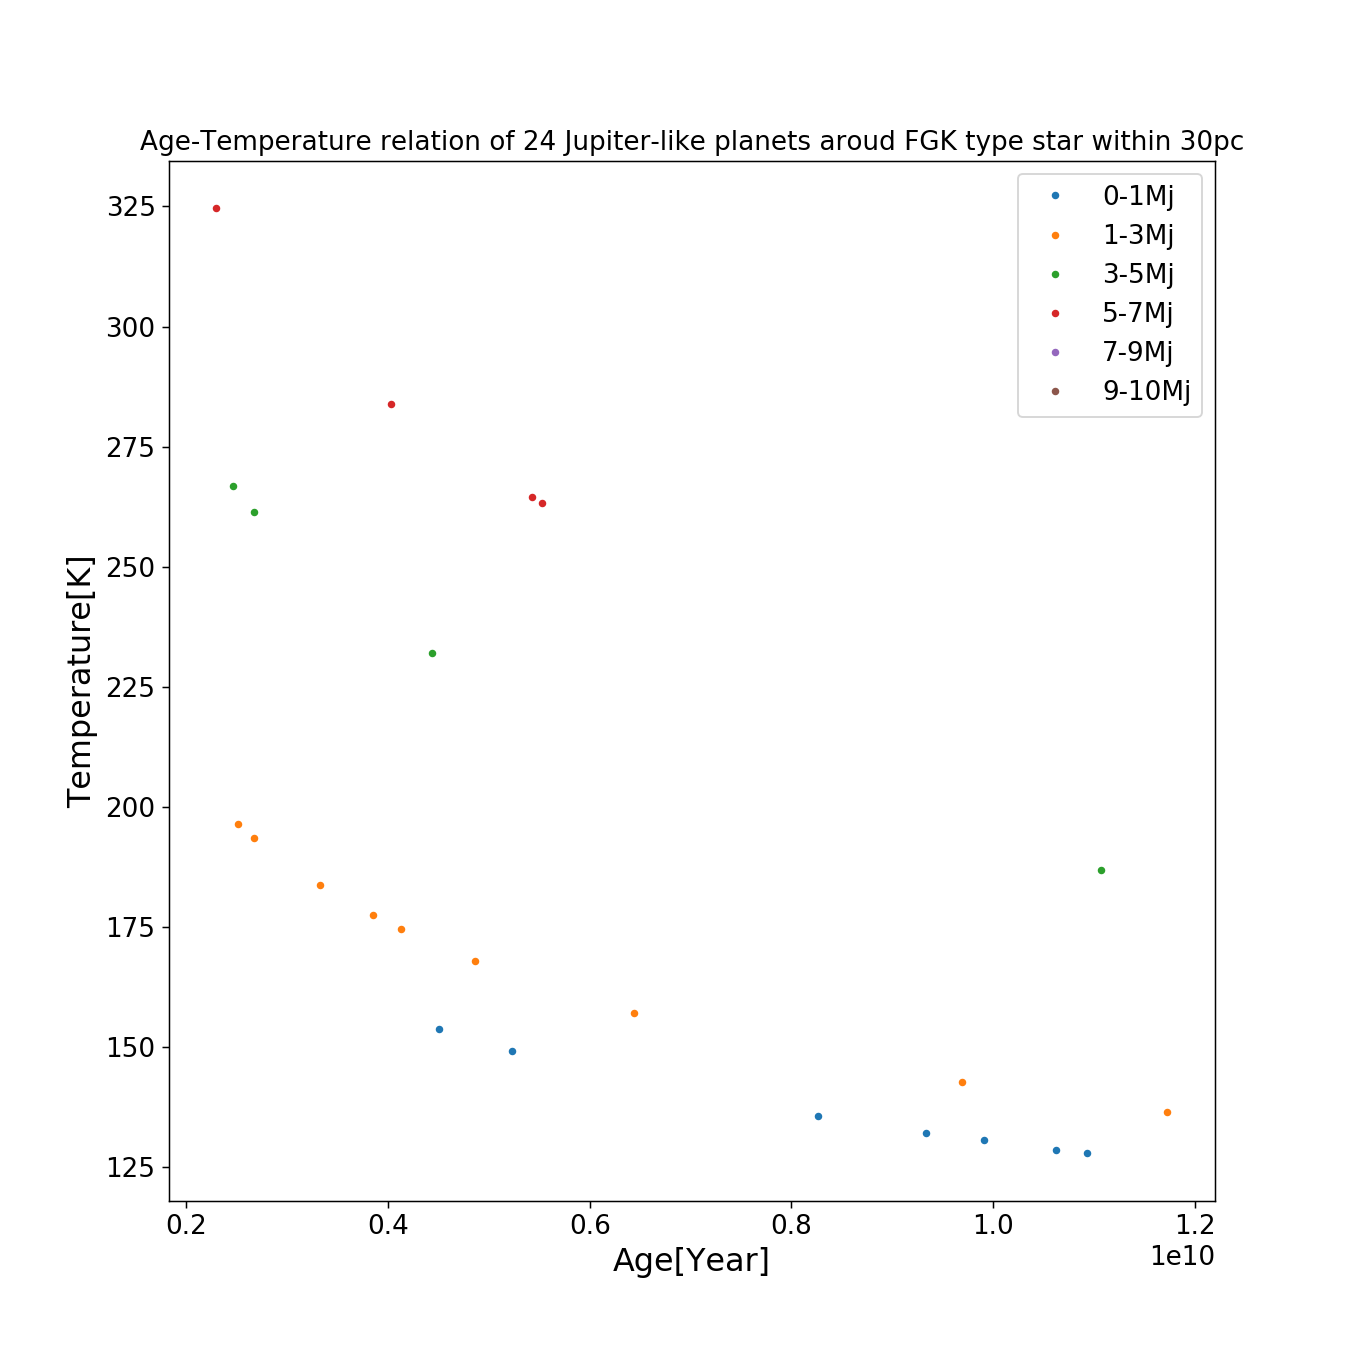

In [65]:
#extrapolated evolution temperatures
FGK_fittemp1 = 10**(FGK_Mj1_age*a1+b1)
FGK_fittemp2 = 10**(FGK_Mj2_age*a2+b2)
FGK_fittemp4 = 10**(FGK_Mj4_age*a4+b4)
FGK_fittemp6 = 10**(FGK_Mj6_age*a6+b6)
FGK_fittemp8 = 10**(FGK_Mj8_age*a8+b8)
FGK_fittemp10 = 10**(FGK_Mj10_age*a10+b10)

#put all temps into one set
FGK_GGevotemp = np.hstack((FGK_fittemp1,FGK_fittemp2,FGK_fittemp4,FGK_fittemp6,FGK_fittemp8,FGK_fittemp10))

#plot temp-age mdoel
plt.figure(figsize=(10,10))
plt.errorbar(10**FGK_Mj1_age,FGK_fittemp1,fmt= '.',label='0-1Mj')
plt.errorbar(10**FGK_Mj2_age,FGK_fittemp2,fmt= '.',label='1-3Mj')
plt.errorbar(10**FGK_Mj4_age,FGK_fittemp4,fmt= '.',label='3-5Mj')
plt.errorbar(10**FGK_Mj6_age,FGK_fittemp6,fmt= '.',label='5-7Mj')
plt.errorbar(10**FGK_Mj8_age,FGK_fittemp8,fmt= '.',label='7-9Mj')
plt.errorbar(10**FGK_Mj10_age,FGK_fittemp10,fmt= '.',label='9-10Mj')
plt.legend()

plt.xlabel('Age[Year]')
plt.ylabel('Temperature[K]')
plt.title('Age-Temperature relation of %d Jupiter-like planets aroud FGK type star within 30pc'%FGK_len_GG)

plt.savefig('FGK-Age-Temp.png')

<IPython.core.display.Javascript object>


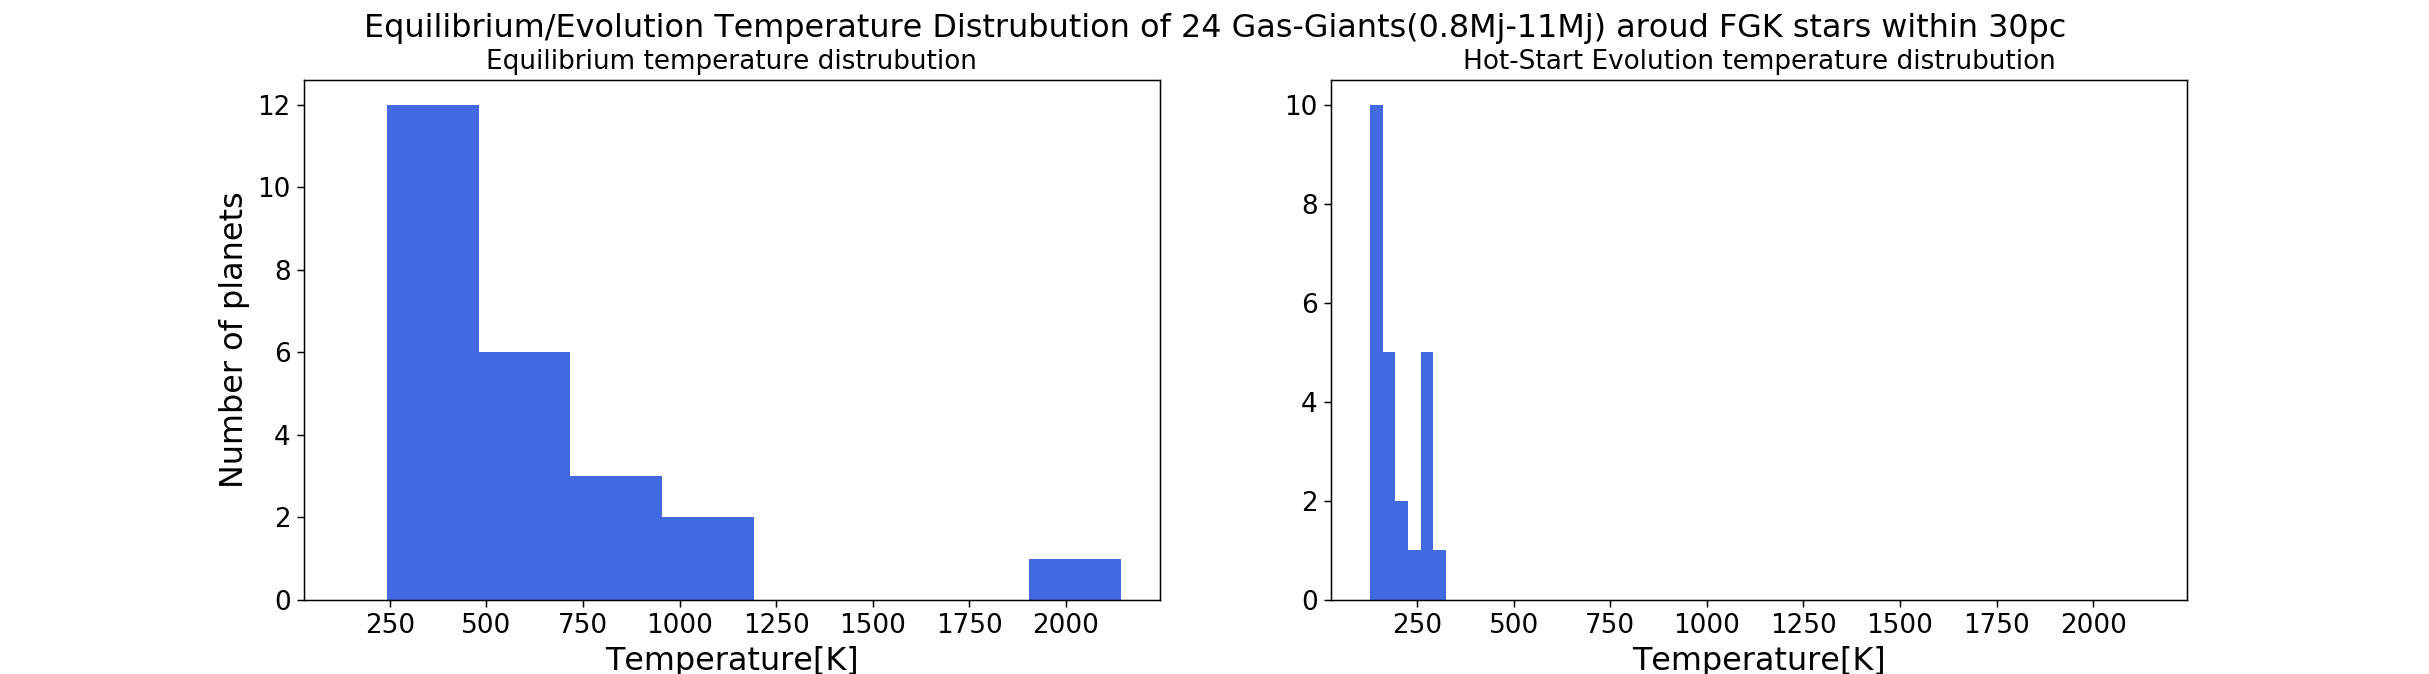

In [29]:
#build the list of equilibrium temps by mass
FGK_GGeqtemp = [Temp_FGK[i] for i in FGK_GGmass_id]

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
ax1.hist(FGK_GGeqtemp, bins='auto',color="royalblue")
ax2.hist(FGK_GGevotemp,bins ='auto',color="royalblue")
ax1.set_xlabel('Temperature[K]')
ax2.set_xlabel('Temperature[K]')
ax1.set_ylabel('Number of planets')
ax1.set_title("Equilibrium temperature distrubution")
ax2.set_title("Hot-Start Evolution temperature distrubution")
f.suptitle("Equilibrium/Evolution Temperature Distrubution of %d Gas-Giants(0.8Mj-11Mj) aroud FGK stars within 30pc"%FGK_len_GG)

#f.tight_layout()
f.set_figheight(5)
f.set_figwidth(18)

<IPython.core.display.Javascript object>


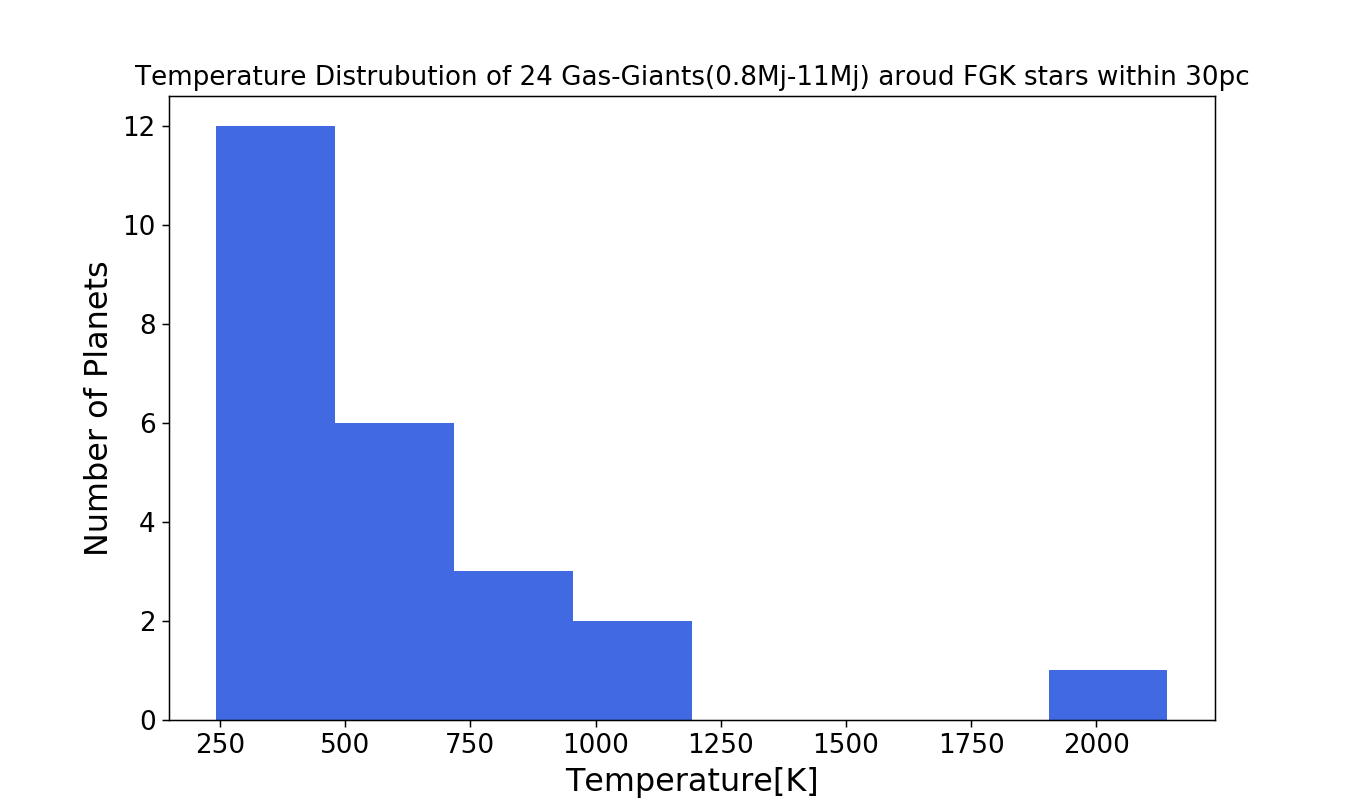

In [66]:
#compare the equilibrium(stellar) and evolutional temperature
#pick out the higher one

FGK_GGtemp = list(map(max, FGK_GGeqtemp, FGK_GGevotemp))

#plot the new histgram
plt.figure(figsize=(10,6))
plt.hist(FGK_GGtemp,bins='auto',color="royalblue")
plt.title("Temperature Distrubution of %d Gas-Giants(0.8Mj-11Mj) aroud FGK stars within 30pc"%FGK_len_GG)
plt.ylabel('Number of Planets')
plt.xlabel('Temperature[K]')

plt.savefig('SAG13_FGK_Temp.png')

### Fit in functions in the hot-start cooling model for M stars

In [67]:
#get rid of the planets with extreme temperatures
#and limit the planet mass to greater or equal to 0.8 Jupiter mass
Mmass = [M_mass[i] for i in M_temp_id]
M_GGmass_id = find_indices(Mmass, lambda i: 0.8<=i<=11.0)
M_GGmass = [Mmass[i] for i in M_GGmass_id]
M_len_GG = len(M_GGmass)

#define the indexing of the mass ranges in FGK_planet array
M_Mj1_id = find_indices(Mmass, lambda i: 0.9<=i<=1.8)
M_Mj2_id = find_indices(Mmass, lambda i: 1.8<i<=3.0)
M_Mj4_id = find_indices(Mmass, lambda i: 3.<i<=5.0)
M_Mj6_id = find_indices(Mmass, lambda i: 5.0<i<=7.0)
M_Mj8_id = find_indices(Mmass, lambda i: 7.0<i<=9.0)
M_Mj10_id = find_indices(Mmass, lambda i: 9.0<i<=11.0)

#the age of the planets in their corresponding mass-range
M_Mj1_age = np.asarray([M_logage[i] for i in M_Mj1_id])
M_Mj2_age = np.asarray([M_logage[i] for i in M_Mj2_id])
M_Mj4_age = np.asarray([M_logage[i] for i in M_Mj4_id])
M_Mj6_age = np.asarray([M_logage[i] for i in M_Mj6_id])
M_Mj8_age = np.asarray([M_logage[i] for i in M_Mj8_id])
M_Mj10_age = np.asarray([M_logage[i] for i in M_Mj10_id])

<IPython.core.display.Javascript object>


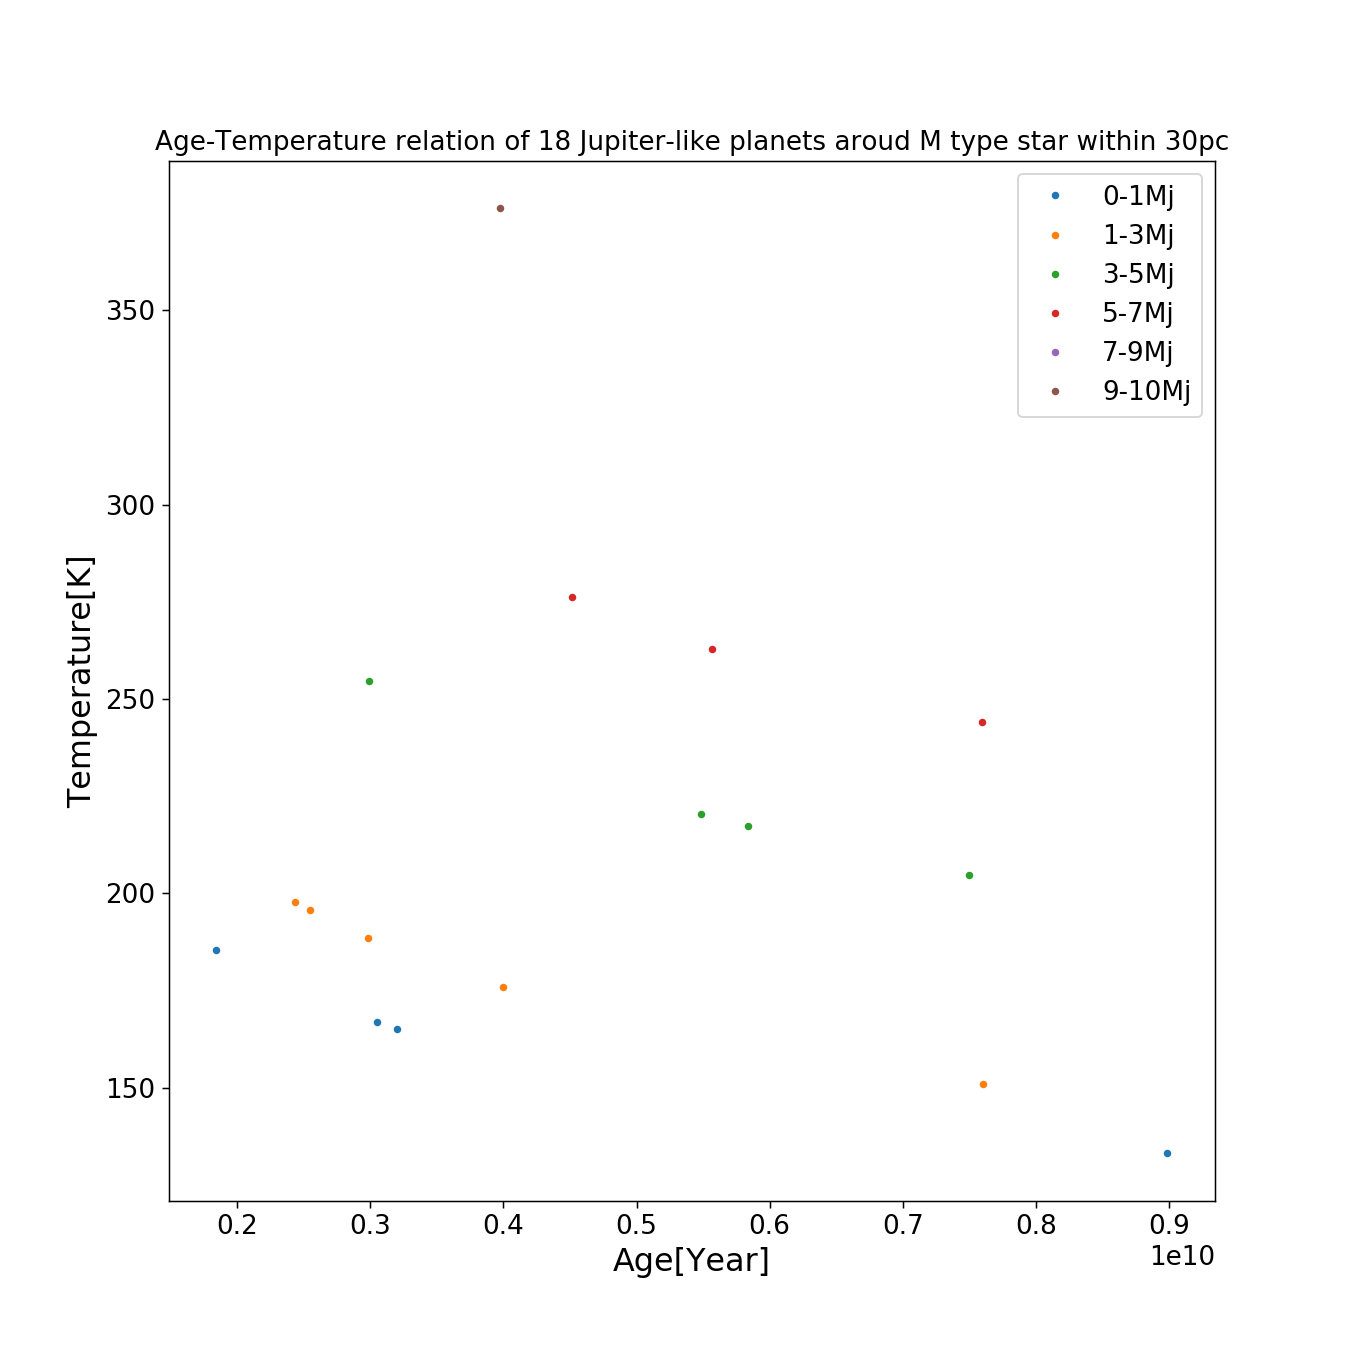

In [68]:
#extrapolated evolution temperatures
M_fittemp1 = 10**(M_Mj1_age*a1+b1)
M_fittemp2 = 10**(M_Mj2_age*a2+b2)
M_fittemp4 = 10**(M_Mj4_age*a4+b4)
M_fittemp6 = 10**(M_Mj6_age*a6+b6)
M_fittemp8 = 10**(M_Mj8_age*a8+b8)
M_fittemp10 = 10**(M_Mj10_age*a10+b10)

#put all temps into one set
M_GGevotemp = np.hstack((M_fittemp1,M_fittemp2,M_fittemp4,M_fittemp6,M_fittemp8,M_fittemp10))

#plot temp-age mdoel
plt.figure(figsize=(10,10))
plt.errorbar(10**M_Mj1_age,M_fittemp1,fmt= '.',label='0-1Mj')
plt.errorbar(10**M_Mj2_age,M_fittemp2,fmt= '.',label='1-3Mj')
plt.errorbar(10**M_Mj4_age,M_fittemp4,fmt= '.',label='3-5Mj')
plt.errorbar(10**M_Mj6_age,M_fittemp6,fmt= '.',label='5-7Mj')
plt.errorbar(10**M_Mj8_age,M_fittemp8,fmt= '.',label='7-9Mj')
plt.errorbar(10**M_Mj10_age,M_fittemp10,fmt= '.',label='9-10Mj')
plt.legend()

plt.xlabel('Age[Year]')
plt.ylabel('Temperature[K]')
plt.title('Age-Temperature relation of %d Jupiter-like planets aroud M type star within 30pc'%M_len_GG)

plt.savefig('M-Age-Temp.png')

<IPython.core.display.Javascript object>


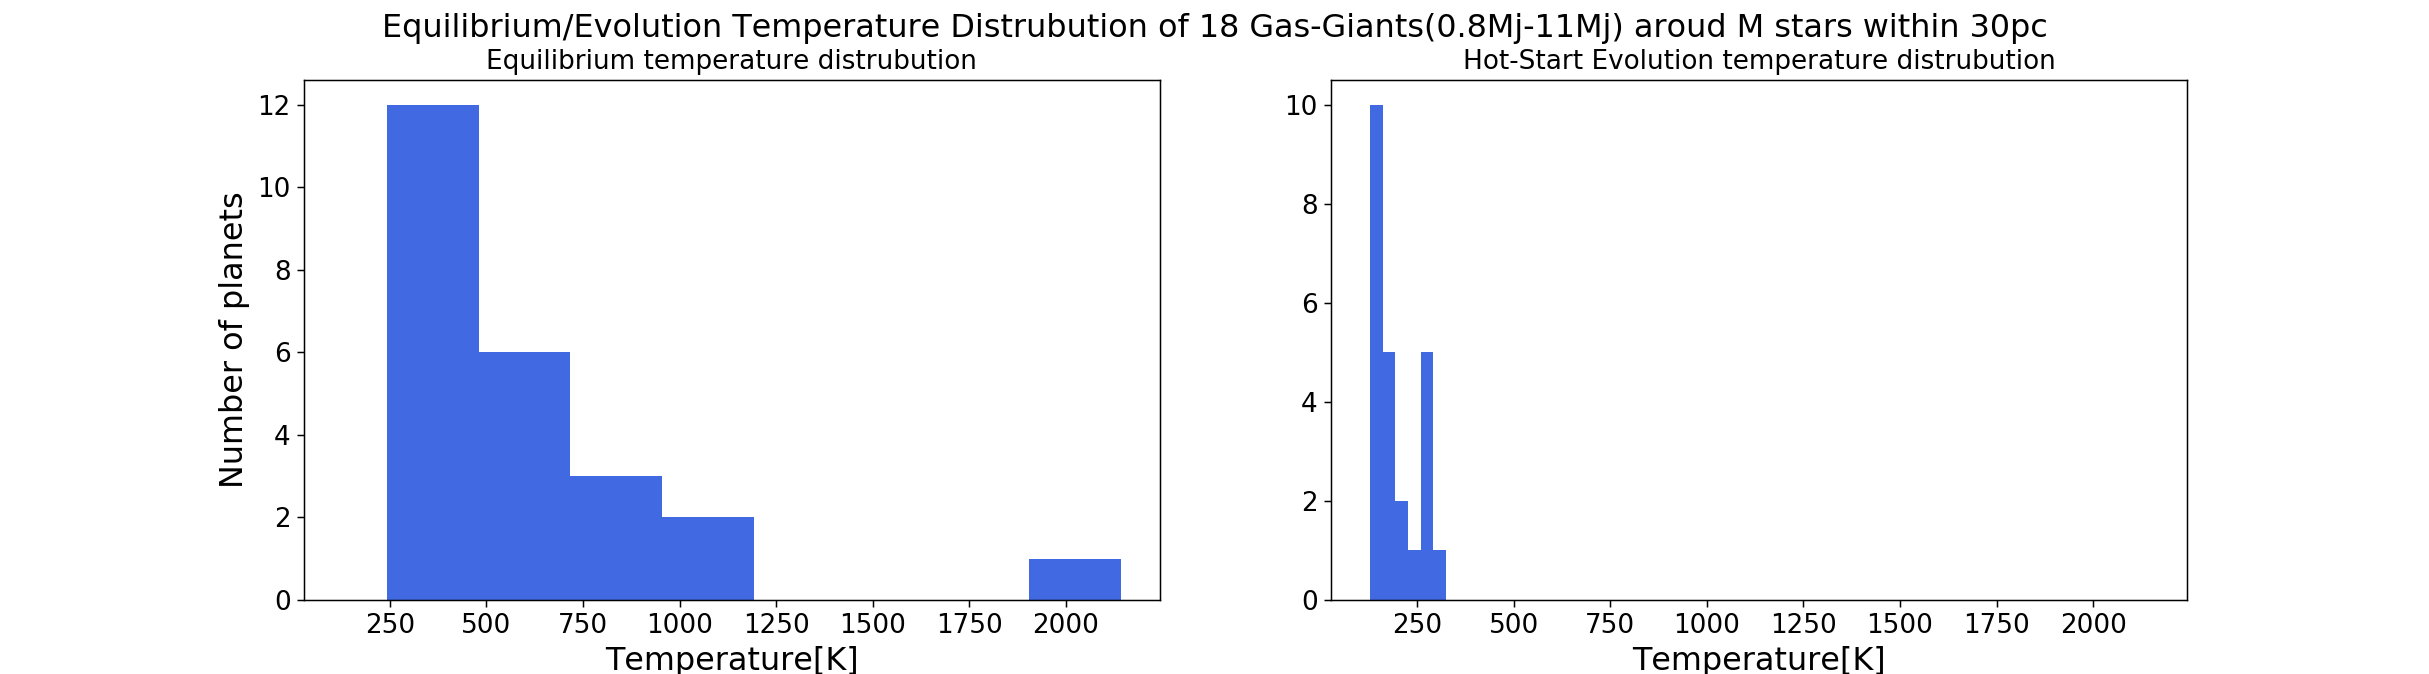

In [33]:
#build the list of equilibrium temps by mass
M_GGeqtemp = [Temp_M[i] for i in M_GGmass_id]

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
ax1.hist(FGK_GGeqtemp, bins='auto',color="royalblue")
ax2.hist(FGK_GGevotemp,bins ='auto',color="royalblue")
ax1.set_xlabel('Temperature[K]')
ax2.set_xlabel('Temperature[K]')
ax1.set_ylabel('Number of planets')
ax1.set_title("Equilibrium temperature distrubution")
ax2.set_title("Hot-Start Evolution temperature distrubution")
f.suptitle("Equilibrium/Evolution Temperature Distrubution of %d Gas-Giants(0.8Mj-11Mj) aroud M stars within 30pc"%M_len_GG)

#f.tight_layout()
f.set_figheight(5)
f.set_figwidth(18)

<IPython.core.display.Javascript object>


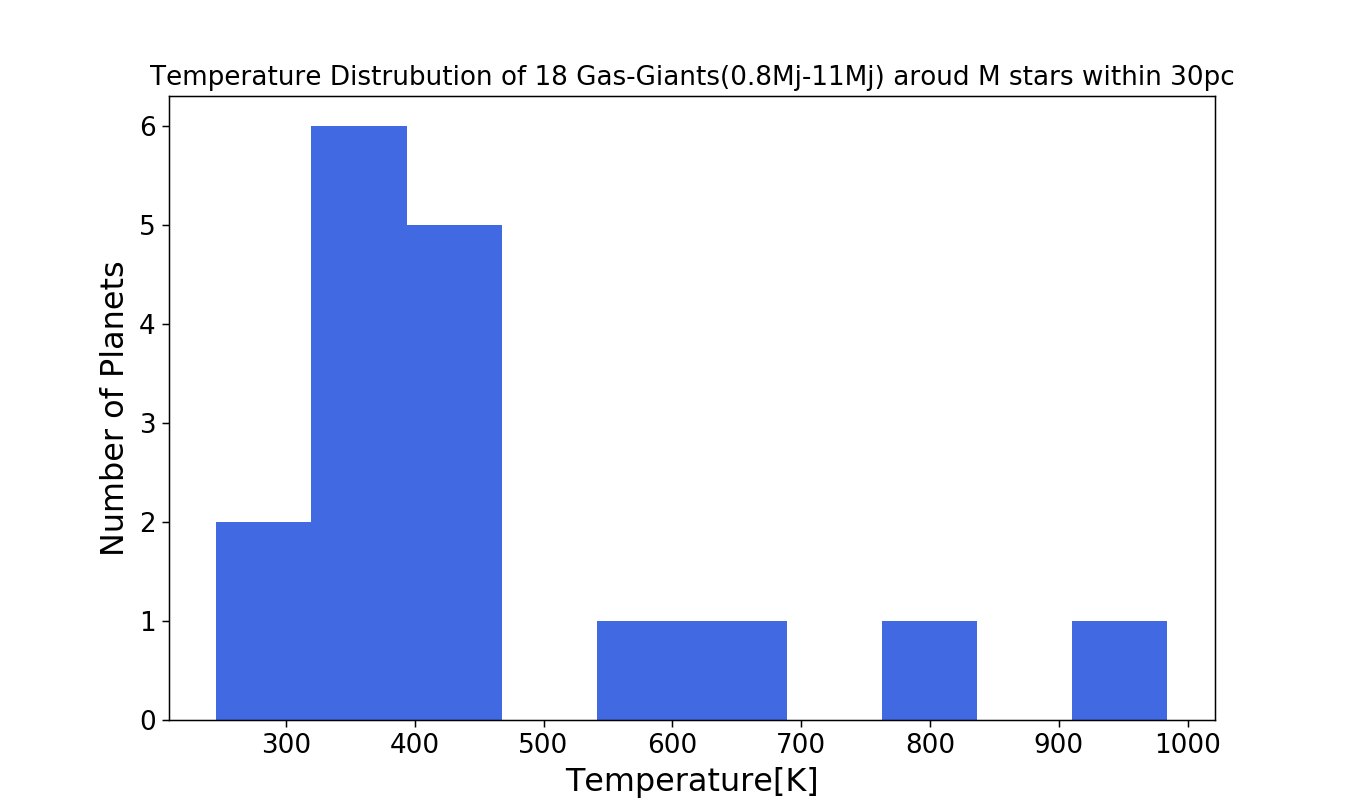

In [69]:
#compare the equilibrium(stellar) and evolutional temperature
#pick out the higher one

M_GGtemp = list(map(max, M_GGeqtemp, M_GGevotemp))

#plot the new histgram
plt.figure(figsize=(10,6))
plt.hist(M_GGtemp,bins='auto',color="royalblue")
plt.title("Temperature Distrubution of %d Gas-Giants(0.8Mj-11Mj) aroud M stars within 30pc"%M_len_GG)
plt.ylabel('Number of Planets')
plt.xlabel('Temperature[K]')

plt.savefig('SAG13_M_Temp.png')

## Evolution model for lower-mass planets

In [35]:
#using Linder's evo model, model detail described in low_mass_model_data_readme.txt
# import all the data from fits files
#"Mn_data" stands for n times of Earth mass
M5_data = fits.getdata('Linder_model_data/J_A+A_623_A85_cooling_curves_BEX_evol_mags_-2_MH_0.00_ME_005.dat.fits')
M10_data = fits.getdata('Linder_model_data/J_A+A_623_A85_cooling_curves_BEX_evol_mags_-2_MH_0.00_ME_010.dat.fits')
M20_data = fits.getdata('Linder_model_data/J_A+A_623_A85_cooling_curves_BEX_evol_mags_-2_MH_0.00_ME_020.dat.fits')
M50_data = fits.getdata('Linder_model_data/J_A+A_623_A85_cooling_curves_BEX_evol_mags_-2_MH_0.00_ME_050.dat.fits')
M100_data = fits.getdata('Linder_model_data/J_A+A_623_A85_cooling_curves_BEX_evol_mags_-2_MH_0.00_ME_100.dat.fits')
M159_data = fits.getdata('Linder_model_data/J_A+A_623_A85_cooling_curves_BEX_evol_mags_-2_MH_0.00_ME_159.dat.fits')
M318_data = fits.getdata('Linder_model_data/J_A+A_623_A85_cooling_curves_BEX_evol_mags_-2_MH_0.00_ME_318.dat.fits')
M636_data = fits.getdata('Linder_model_data/J_A+A_623_A85_cooling_curves_BEX_evol_mags_-2_MH_0.00_ME_636.dat.fits')

In [36]:
# define the functions to extact logage & Temp from read data

#define the logage of the planets
#which is the origional data
def logage(Mn_data):
    return [item[0] for item in Mn_data]

#define the age of the planets
#changed from logage
def age(Mn_data):
    age = []
    logage = [item[0] for item in Mn_data]
    for i in logage:
        age.append(i**10)
    return age

#define the effective temperature
def Teff(Mn_data):
    return [item[4] for item in Mn_data] 

#define a new linearfit to perform
def linearfit_new(x,y):
    return np.polyfit(x,log(y),1)

<IPython.core.display.Javascript object>


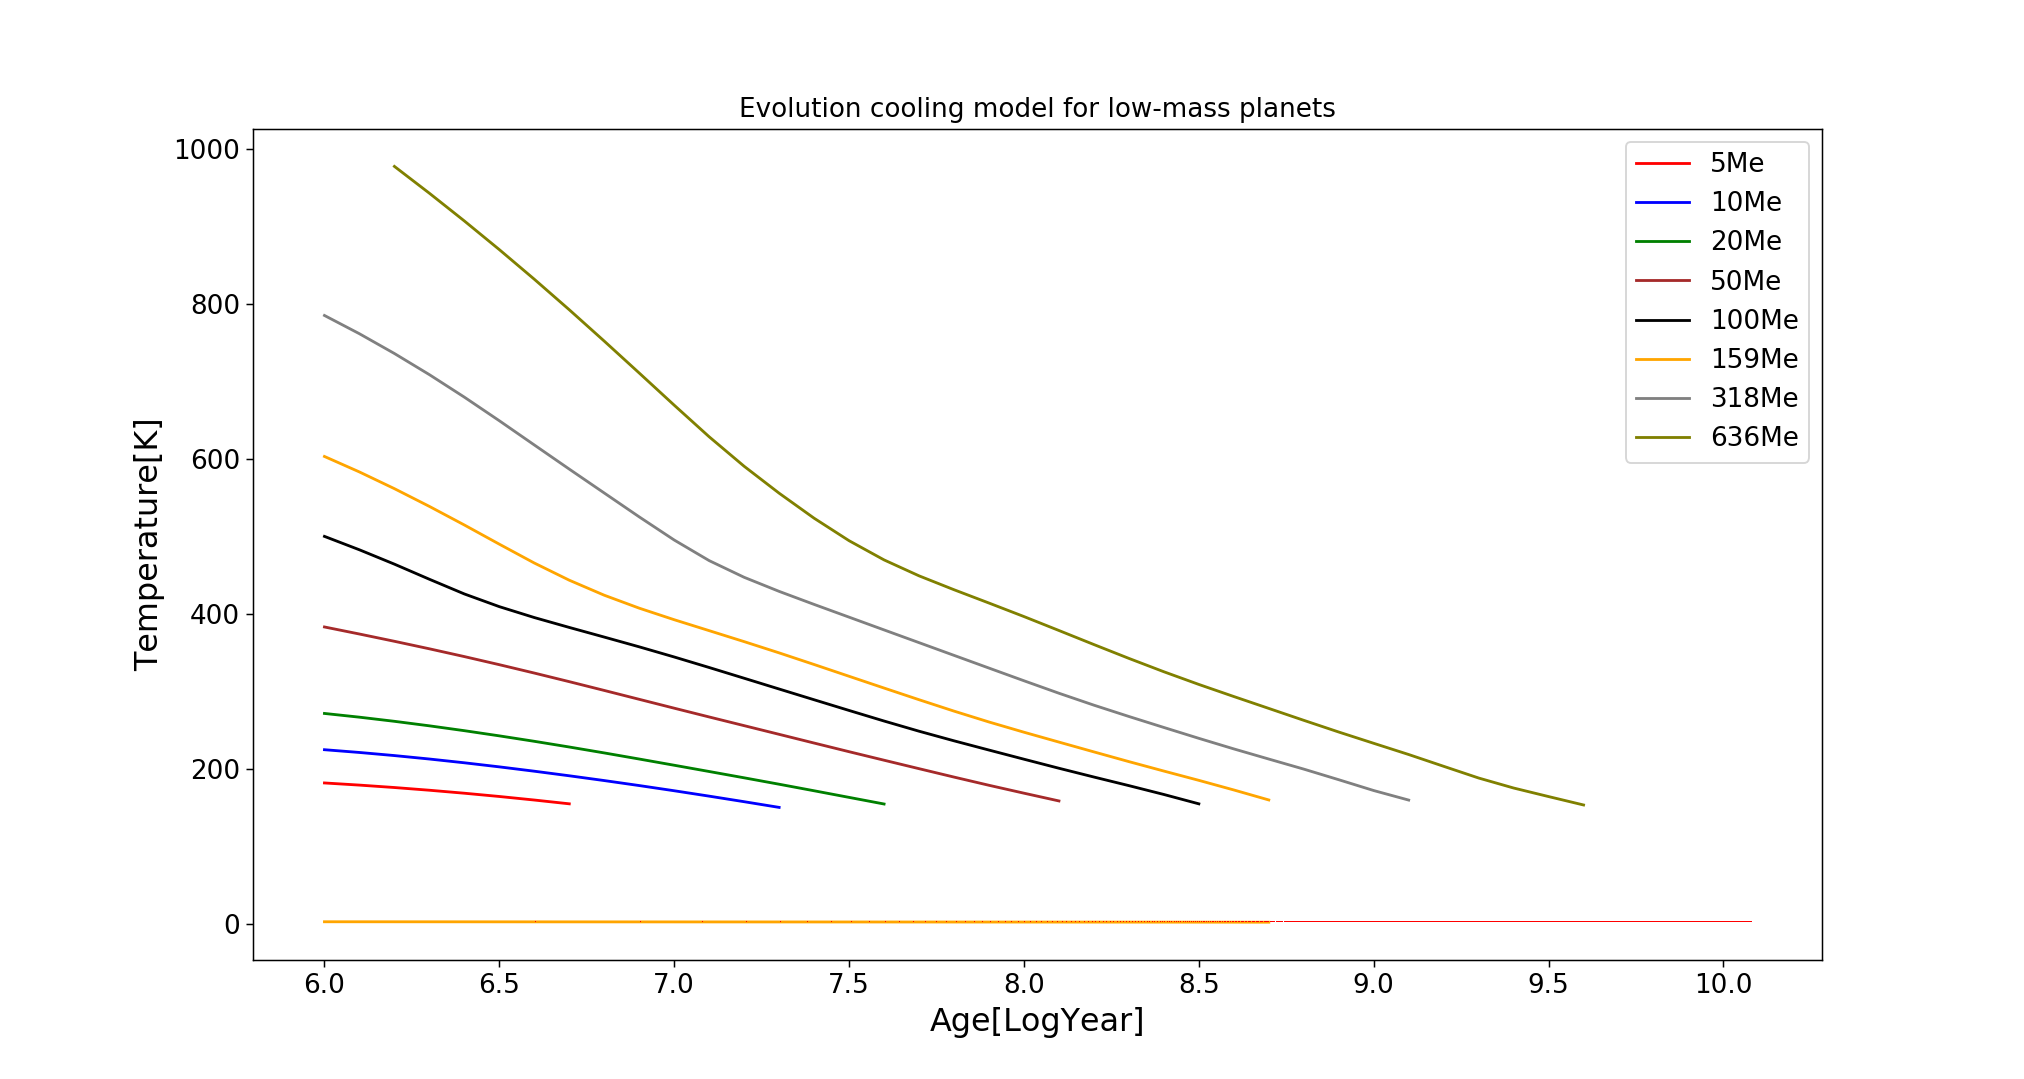

In [37]:
#plot the origional data
plt.figure(figsize=(15,8))

plt.ylabel('Temperature[K]')
plt.xlabel('Age[LogYear]')
plt.title("Evolution cooling model for low-mass planets")

plt.plot(logage(M5_data),Teff(M5_data),label='5Me',color = 'red')
plt.plot(logage(M10_data),Teff(M10_data),label='10Me',color = 'blue')
plt.plot(logage(M20_data),Teff(M20_data),label='20Me',color = 'green')
plt.plot(logage(M50_data),Teff(M50_data),label='50Me',color = 'brown')
plt.plot(logage(M100_data),Teff(M100_data),label='100Me',color = 'black')
plt.plot(logage(M159_data),Teff(M159_data),label='159Me',color = 'orange')
plt.plot(logage(M318_data),Teff(M318_data),label='318Me',color = 'gray')
plt.plot(logage(M636_data),Teff(M636_data),label='636Me',color = 'olive')

plt.legend()

In [38]:
def modTeff(a,b):
    return 10**(model_age*a+b)

#fit the lines
a5,b5 = linearfit_new(logage(M5_data),Teff(M5_data))
ae10,be10 = linearfit_new(logage(M10_data),Teff(M10_data))
a20,b20 = linearfit_new(logage(M20_data),Teff(M20_data))
a50,b50 = linearfit_new(logage(M50_data),Teff(M50_data))
a100,b100 = linearfit_new(logage(M100_data),Teff(M100_data))
a159,b159 = linearfit_new(logage(M159_data),Teff(M159_data))



In [39]:
plt.plot(logage(M159_data),np.log10(Teff(M159_data)),label='159Me',color = 'orange')
plt.errorbar(model_age,log(modTeff(a159,b159)),fmt= ',',color = 'red')




<ErrorbarContainer object of 3 artists>

<IPython.core.display.Javascript object>


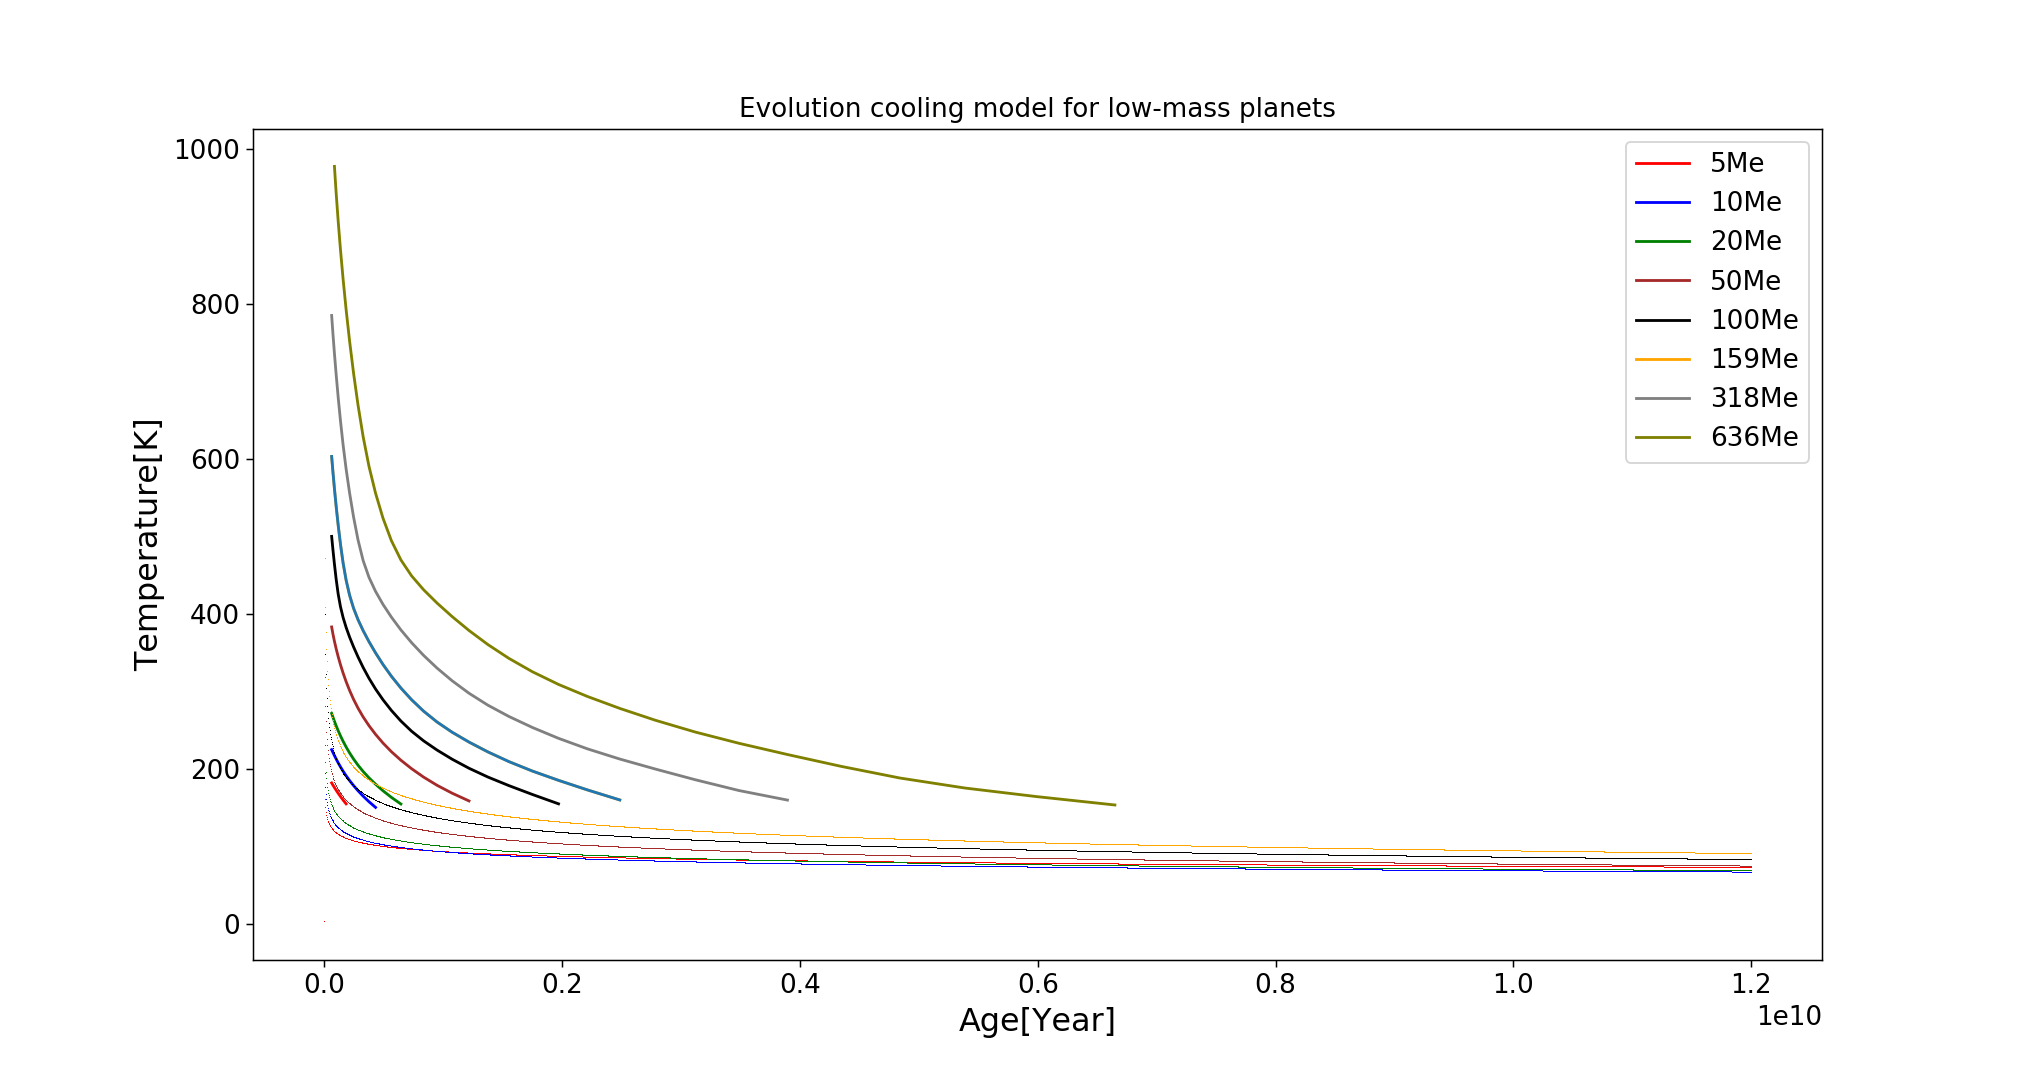

In [40]:
plt.figure(figsize=(15,8))

plt.ylabel('Temperature[K]')
plt.xlabel('Age[Year]')
plt.title("Evolution cooling model for low-mass planets")
#plt.xlim(0,1.2e10)

plt.plot(age(M5_data),Teff(M5_data),label='5Me',color = 'red')
plt.plot(age(M10_data),Teff(M10_data),label='10Me',color = 'blue')
plt.plot(age(M20_data),Teff(M20_data),label='20Me',color = 'green')
plt.plot(age(M50_data),Teff(M50_data),label='50Me',color = 'brown')
plt.plot(age(M100_data),Teff(M100_data),label='100Me',color = 'black')
plt.plot(age(M159_data),Teff(M159_data),label='159Me',color = 'orange')
plt.plot(age(M318_data),Teff(M318_data),label='318Me',color = 'gray')
plt.plot(age(M636_data),Teff(M636_data),label='636Me',color = 'olive')
#plt.loglog()

plt.errorbar(10**model_age,modTeff(a5,b5),fmt= ',',color = 'red')
plt.errorbar(10**model_age,modTeff(ae10,be10),fmt= ',',color = 'blue')
plt.errorbar(10**model_age,modTeff(a20,b20),fmt= ',',color = 'green')
plt.errorbar(10**model_age,modTeff(a50,b50),fmt= ',',color = 'brown')
plt.errorbar(10**model_age,modTeff(a100,b100),fmt= ',',color = 'black')
plt.errorbar(10**model_age,10**(model_age*a159+b159),fmt= ',',color = 'orange')
plt.legend()


In [41]:
plt.plot(age(M159_data),Teff(M159_data))
plt.plot(logage(M159_data),np.log10(Teff(M159_data)))
#plt.plot(10**model_age,modTeff(a159,b159))
#plt.loglog()

In [42]:
plt.plot(logage(M159_data),np.log10(Teff(M159_data)),label='159Me',color = 'orange')
plt.errorbar(model_age,log(modTeff(a159,b159)),fmt= ',',color = 'red')


<ErrorbarContainer object of 3 artists>